<a href="https://colab.research.google.com/github/cosmina98/PhD/blob/main/Deep_learning_for_moleculesipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objectives  for this notebook
- Use SMILES and InChI strings to specify the input compound for a PUG-REST request.
- Use a structure-data (SD) file to specify the input compound for a PUG-REST request.
- Learn to submit a PUG-REST request using the HTTP-POST method.
- Depositor-provided records (i.e., substances) that are standardized to a given compound.
- Mixture compounds that contain a given component compound.
- Stereoisomers/isotopomers of a given compound.
- Compounds that are tested to be active in a given assay.
- Compounds that have similar structures to a given compound
-identity search
-similarity search
-super/substructure search
-molecular formula search

## Imports

In [1]:
!git clone https://github.com/mcs07/PubChemPy.git
!pip install PubChemPy  --quiet
!pip install --upgrade sdf --quiet


Cloning into 'PubChemPy'...
remote: Enumerating objects: 477, done.
remote: Total 477 (delta 0), reused 0 (delta 0), pack-reused 477
Receiving objects: 100% (477/477), 272.41 KiB | 5.45 MiB/s, done.
Resolving deltas: 100% (244/244), done.

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --update
     |████████████████████████████████| 141 kB 5.2 MB/s 


In [7]:
!pip install pubchempy
!pip install rdkit --quiet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 36.8 MB 288 kB/s 


In [42]:
!pip install mordred

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 128 kB 5.0 MB/s 
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176725 sha256=ea55eb9514fc930885dada93a598f77955faea22318a6df7a1cc97ff4b420638
  Stored in directory: /root/.cache/pip/wheels/02/c0/2e/e7e3d63b431777712ebc128bc4deb9ac5cb19afc7c1ea341ec
Successfully built mordred


In [3]:
import pubchempy as pcp


In [70]:
from google.colab import drive
drive.mount('content')
import requests
import time

Mounted at content





## Properties

In [4]:
c = pcp.Compound.from_cid(5090)

print (c.molecular_formula)
print (c.molecular_weight)
print (c.isomeric_smiles)
print (c.xlogp)
print (c.iupac_name)
print(c.synonyms)
e=c.to_dict(properties=None)
for key, items in enumerate(e):
    print(key, items)

C17H14O4S
314.4
CS(=O)(=O)C1=CC=C(C=C1)C2=C(C(=O)OC2)C3=CC=CC=C3
2.3
3-(4-methylsulfonylphenyl)-4-phenyl-2H-furan-5-one
['rofecoxib', '162011-90-7', 'Vioxx', 'Ceoxx', 'MK 966', '4-(4-(Methylsulfonyl)phenyl)-3-phenylfuran-2(5H)-one', '4-[4-(methylsulfonyl)phenyl]-3-phenylfuran-2(5H)-one', 'MK-966', 'MK 0966', 'MK-0966', '4-[4-(methylsulfonyl)phenyl]-3-phenyl-2(5H)-furanone', 'MK0966', '3-(4-methylsulfonylphenyl)-4-phenyl-2H-furan-5-one', 'UNII-0QTW8Z7MCR', 'Rofecoxib (Vioxx)', 'C17H14O4S', '3-phenyl-4-[4-(methylsulfonyl)phenyl]-2(5H)-furanone', '0QTW8Z7MCR', 'CHEMBL122', '4-(4-(Methylsulfonyl)phenyl)-3-phenyl-2(5H)-furanone', 'CHEBI:8887', 'TRM-201', 'MK966', 'NSC-720256', 'NSC-758705', '2(5H)-Furanone, 4-[4-(methylsulfonyl)phenyl]-3-phenyl-', 'refecoxib', 'NCGC00095118-01', '4-(4-methanesulfonylphenyl)-3-phenyl-2,5-dihydrofuran-2-one', 'Vioxx Dolor', '2(5H)-Furanone, 4-(4-(methylsulfonyl)phenyl)-3-phenyl-', 'Vioxx (trademark)', 'SMR000466331', 'CCRIS 8967', 'Vioxx (TN)', 'HSDB 7262', '

In [22]:
results = pcp.get_compounds('CC(C)CC1=CC=C(C=C1)C(C)C(=O)O', namespace='smiles')
print(results)
c = pcp.Compound.from_cid(5090)

print (c.iupac_name)
print(c.synonyms)

[Compound(3672)]
3-(4-methylsulfonylphenyl)-4-phenyl-2H-furan-5-one
['rofecoxib', '162011-90-7', 'Vioxx', 'Ceoxx', 'MK 966', '4-(4-(Methylsulfonyl)phenyl)-3-phenylfuran-2(5H)-one', '4-[4-(methylsulfonyl)phenyl]-3-phenylfuran-2(5H)-one', 'MK-966', 'MK 0966', 'MK-0966', '4-[4-(methylsulfonyl)phenyl]-3-phenyl-2(5H)-furanone', 'MK0966', '3-(4-methylsulfonylphenyl)-4-phenyl-2H-furan-5-one', 'UNII-0QTW8Z7MCR', 'Rofecoxib (Vioxx)', 'C17H14O4S', '3-phenyl-4-[4-(methylsulfonyl)phenyl]-2(5H)-furanone', '0QTW8Z7MCR', 'CHEMBL122', '4-(4-(Methylsulfonyl)phenyl)-3-phenyl-2(5H)-furanone', 'CHEBI:8887', 'TRM-201', 'MK966', 'NSC-720256', 'NSC-758705', '2(5H)-Furanone, 4-[4-(methylsulfonyl)phenyl]-3-phenyl-', 'refecoxib', 'NCGC00095118-01', '4-(4-methanesulfonylphenyl)-3-phenyl-2,5-dihydrofuran-2-one', 'Vioxx Dolor', '2(5H)-Furanone, 4-(4-(methylsulfonyl)phenyl)-3-phenyl-', 'Vioxx (trademark)', 'SMR000466331', 'CCRIS 8967', 'Vioxx (TN)', 'HSDB 7262', 'SR-01000762904', 'rofecoxibum', 'Rofecoxib (JAN/USAN

##SDF Read

In [ ]:
mysdf = '''1983
  -OEChem-07241917072D

 20 20  0     0  0  0  0  0  0999 V2000
    2.8660   -2.5950    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    4.5981    1.4050    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.8660    1.4050    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    2.8660    0.4050    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7320   -0.0950    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.0000   -0.0950    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7320   -1.0950    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.0000   -1.0950    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.8660   -1.5950    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7320    1.9050    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7320    2.9050    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.2690    0.2150    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.4631    0.2150    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.3291    1.7150    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    4.2690   -1.4050    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.4631   -1.4050    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    4.3520    2.9050    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    3.7320    3.5250    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    3.1120    2.9050    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.3291   -2.9050    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  9  1  0  0  0  0
  1 20  1  0  0  0  0
  2 10  2  0  0  0  0
  3  4  1  0  0  0  0
  3 10  1  0  0  0  0
  3 14  1  0  0  0  0
  4  5  2  0  0  0  0
  4  6  1  0  0  0  0
  5  7  1  0  0  0  0
  5 12  1  0  0  0  0
  6  8  2  0  0  0  0
  6 13  1  0  0  0  0
  7  9  2  0  0  0  0
  7 15  1  0  0  0  0
  8  9  1  0  0  0  0
  8 16  1  0  0  0  0
 10 11  1  0  0  0  0
 11 17  1  0  0  0  0
 11 18  1  0  0  0  0
 11 19  1  0  0  0  0
M  END
> <PUBCHEM_COMPOUND_CID>
1983

> <PUBCHEM_COMPOUND_CANONICALIZED>
1

> <PUBCHEM_CACTVS_COMPLEXITY>
139

> <PUBCHEM_CACTVS_HBOND_ACCEPTOR>
2

> <PUBCHEM_CACTVS_HBOND_DONOR>
2

> <PUBCHEM_CACTVS_ROTATABLE_BOND>
1
$$$$
'''

In [ ]:
url = prolog + "/compound/sdf/cids/txt"
mydata = { 'sdf': mysdf }
res = requests.post(url, data=mydata) # the multiline sdf as URL data
print(res.url)
print(res.text)

In [ ]:
with open('Structure2D_CID_521156.sdf', 'r') as file:
    mysdf = file.read()
    
print(mysdf)

In [ ]:
prolog = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug'
url = prolog + "/compound/sdf/synonyms/txt"
mydata = { 'sdf': mysdf }
res = requests.post(url, data=mydata)
print(res.text)

## Reading using PUG-REST

In [176]:
import requests

In [177]:
pugrest = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
pugin   = "compound/name/water"
pugoper = "property/MolecularFormula"
pugout  = "txt"
url     = pugrest + '/' + pugin + '/' + pugoper + '/' + pugout
print(url)

https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/water/property/MolecularFormula/txt


In [178]:
url = "/".join( [pugrest, pugin, pugoper, pugout] )
print(url)
res = requests.get(url)
print(res.text)


https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/water/property/MolecularFormula/txt
H2O



In [179]:
names = [ 'cytosine', 'benzene', 'motrin', 'aspirin', 'zolpidem' ]
pugrest = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
pugoper = "property/CanonicalSMILES"
pugout  = "txt"

for myname in names:    # loop over each element in the "names" list
    
    pugin = "compound/name/" + myname
    
    url = "/".join( [pugrest, pugin, pugoper, pugout] )
    res = requests.get(url)
    print(myname, ":", res.text)

cytosine : C1=C(NC(=O)N=C1)N

benzene : C1=CC=CC=C1

motrin : CC(C)CC1=CC=C(C=C1)C(C)C(=O)O

aspirin : CC(=O)OC1=CC=CC=C1C(=O)O

zolpidem : CC1=CC=C(C=C1)C2=C(N3C=C(C=CC3=N2)C)CC(=O)N(C)C



In [180]:
names = [ 'water', 'benzene', 'methanol', 'ethene', 'ethanol', \
          'propene','1-propanol', '2-propanol', 'butadiene', '1-butanol', \
          '2-butanol', 'tert-butanol']

In [181]:
import time
pugrest = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
pugoper = "property/CanonicalSMILES"
pugout  = "txt"

for i in range(len(names)):    # loop over each index (position) in the "names" list

    pugin = "compound/name/" + names[i]    # names[i] = the ith element in the names list.
    url = "/".join( [pugrest, pugin, pugoper, pugout])
    res = requests.get(url)
    print(names[i], ":", res.text)
    if ( i % 5 == 4 ) :  # the % is the modulo operator and returns the remainder of a calculation (if i = 4, 9, ...)
        time.sleep(1)


water : O

benzene : C1=CC=CC=C1

methanol : CO

ethene : C=C

ethanol : CCO

propene : CC=C

1-propanol : CCCO

2-propanol : CC(C)O

butadiene : C=CC=C

1-butanol : CCCCO

2-butanol : CCC(C)O

tert-butanol : CC(C)(C)O



In [182]:
pugrest = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
pugin   = "compound/cid/4485,4499,5026,5734,8082"
pugoper = "property/HBondDonorCount,HBondDonorCount,XLogP,TPSA"
pugout  = "csv"

url = "/".join( [pugrest, pugin, pugoper, pugout] )   # Construct the URL
print(url)
print("-" * 30)   # Print "-" 30 times (to print a line for readability)

res = requests.get(url)
print(res.text)

https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/4485,4499,5026,5734,8082/property/HBondDonorCount,HBondDonorCount,XLogP,TPSA/csv
------------------------------
"CID","HBondDonorCount","HBondDonorCount","XLogP","TPSA"
4485,1,1,2.200,110.0
4499,1,1,3.300,110.0
5026,1,1,4.300,123.0
5734,1,1,0.2,94.6
8082,1,1,0.800,12.0



In [183]:
cids = [ 443422,  72301,   8082,    4485,    5353740, 5282230, 5282138, 1547484, 941361, 5734,  \
         5494,    5422,    5417,    5290,    5245,    5026,    4746,    4507,    4499,   4497,  \
         4494,    4474,    4418,    4386,    4009,    4008,    3949,    3926,    3878,   3784,  \
         3698,    3547,    3546,    3336,    3333,    3236,    3076,    2585,    2520,   2351,  \
         2312,    2162,    1236,    1234,    292331,  275182,  235244,  108144,  104972, 77157, \
         5942250, 5311217, 4564402, 4715169, 5311501]


In [184]:
chunk_size = 10

if ( len(cids) % chunk_size == 0 ) : # check if total number of cids is divisible by 10 with no remainder
    num_chunks = len(cids) // chunk_size # sets number of chunks
else : # if divide by 10 results in remainder
    num_chunks = len(cids) // chunk_size + 1 # add one more chunk

print("# Number of CIDs:", len(cids) )
print("# Number of chunks:", num_chunks )

# Number of CIDs: 55
# Number of chunks: 6


In [185]:
pugrest = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
pugoper = "property/HBondDonorCount,HBondAcceptorCount,XLogP,TPSA"
pugout  = "csv"

csv = ""   #sets a variable called csv to save the comma separated output

for i in range(num_chunks) : # sets number of requests to number of data chunks as determined above
    
    idx1 = chunk_size * i        # sets a variable for a moving window of cids to start in a data chunk
    idx2 = chunk_size * (i + 1)  # sets a variable for a moving window of cids to end ina data chunk

    pugin = "compound/cid/" + ",".join([ str(x) for x in cids[idx1:idx2] ]) # build pug input for chunks of data
    url = "/".join( [pugrest, pugin, pugoper, pugout] )   # Construct the URL
    
    res = requests.get(url)

    if ( i == 0 ) : # if this is the first request, store result in empty csv variable
        csv = res.text 
    else :          # if this is a subsequent request, add the request to the csv variable adding a new line between chunks
        csv = csv + "\n".join(res.text.split()[1:]) + "\n" 
    
    if (i % 5 == 4):  
        time.sleep(1)

print(csv)

"CID","HBondDonorCount","HBondAcceptorCount","XLogP","TPSA"
443422,0,5,3.1,40.2
72301,0,5,3.2,40.2
8082,1,1,0.800,12.0
4485,1,7,2.200,110.0
5353740,2,5,3.5,76.0
5282230,2,5,3.2,84.9
5282138,1,8,4.400,120.0
1547484,0,2,5.800,6.5
941361,0,4,6.000,6.5
5734,1,5,0.2,94.6
5494,0,6,5.0,57.2
5422,0,8,6.4,61.9
5417,0,5,3.2,40.2
5290,2,5,2.6,62.2
5245,5,8,-3.1,148.0
5026,1,8,4.300,123.0
4746,1,1,6.8,12.0
4507,1,7,2.900,110.0
4499,1,7,3.300,110.0
4497,1,8,3.100,120.0
4494,1,8,2.900,134.0
4474,1,8,3.800,114.0
4418,1,5,4.100,45.2
4386,2,3,4.400,49.3
4009,2,5,3.5,76.0
4008,1,9,5.600,117.0
3949,0,7,4.9,34.2
3926,1,5,6.0,35.6
3878,2,5,1.4,90.7
3784,1,8,4.300,104.0
3698,2,3,-0.2,68.0
3547,1,5,1.0,70.7
3546,3,5,-0.5,132.0
3336,1,1,5.5,12.0
3333,1,5,3.900,64.6
3236,0,2,3.8,20.3
3076,0,6,3.1,84.4
2585,3,5,4.200,75.7
2520,0,6,3.800,64.0
2351,0,3,5.3,15.7
2312,0,2,4.6,12.5
2162,2,7,3.000,99.9
1236,1,8,6.800,114.0
1234,0,7,3.800,73.2
292331,2,3,3.900,49.3
275182,1,8,6.1,72.9
235244,1,8,6.7,72.9
108144,2,5,3.

Antiinflamatory agents 

In [186]:
cids = [ 471, 1981, 2005, 2097, 2151, 2198, 2206, 2214, 2244, 2307, 2308, 2313, 2355, 2396, 2449, 2462, 2466, 2581, 2662, 2794, 2863, 3000, 3003, 3033, 3056, 3059, 3111, 3177, 3194, 3230, 3242, 3282, 3308, 3332, 3335, 3342, 3360, 3371, 3379, 3382, 3384, 3394, 3495, 3553, 3612, 3672, 3715, 3716, 3718, 3778, 3824, 3825, 3826, 3935, 3946, 3965, 4009, 4037, 4038, 4044, 4075, 4159, 4237, 4386, 4409, 4413, 4487, 4488, 4495, 4534, 4553, 4614, 4641, 4671, 4692, 4781, 4888, 4895, 4921, 5059, 5090, 5147, 5161, 5208, 5228, 5339, 5352, 5359, 5362, 5468, 5469, 5475, 5480, 5509, 5733, 5743, 5744, 5745, 5753, 5754, 5755, 5834, 5865, 5875, 5876, 5877, 6094, 6213, 6215, 6247, 6436, 6741, 7090, 7497, 8522, 9053, 9231, 9642, 9782, 9878, 10114, 10154, 10170, 10185, 10206, 12555, 12938, 13802, 14982, 15209, 16490, 16533, 16623, 16639, 16752, 16923, 17198, 19161, 20469, 21102, 21700, 21800, 21826, 21975, 22419, 23205, 26098, 26248, 26318, 28718, 28871, 30869, 30870, 30951, 31307, 31378, 31508, 31635, 31799, 31800, 32153, 32327, 32798, 33958, 35375, 35455, 35935, 36833, 37425, 38081, 38503, 39212, 39941, 40000, 40632, 41643, 43261, 44219, 47462, 47795, 50294, 50295, 51717, 54445, 54585, 57782, 59757, 60164, 60490, 60542, 60712, 60726, 60864, 61486, 62074, 62924, 63006, 63019, 64704, 64738, 64746, 64747, 64927, 64945, 64971, 64982, 65394, 65464, 65655, 65679, 65762, 66249, 67417, 68700, 68704, 68706, 68731, 68749, 68819, 68865, 68869, 68917, 71246, 71354, 71364, 71386, 71398, 71414, 71415, 71771, 72158, 72300, 73400, 82153, 84003, 84429, 90763, 91626, 91670, 100472, 102011, 104762, 104943, 107641, 107738, 107793, 108068, 108130, 114753, 114840, 114917, 114999, 115239, 119032, 119286, 119365, 119607, 119828, 119871, 121928, 121957, 122139, 122179, 122182, 123619, 123673, 123723, 124978, 128191, 128229, 128571, 133021, 134896, 146364, 151075, 151166, 152165, 155354, 155761, 156391, 158103, 159557, 162666, 164676, 167928, 168928, 174093, 174277, 176155, 177976, 180604, 183088, 189821, 192156, 196122, 196840, 196841, 200674, 201587, 219121, 222786, 229860, 235244, 236702, 259846, 263373, 275182, 292331, 425990, 439503, 439533, 441335, 441336, 442534, 442993, 443943, 443949, 443967, 444036, 445154, 445858, 446925, 479503, 485711, 490428, 501254, 522325, 546807, 578771, 584547, 610479, 633091, 633097, 636374, 636398, 656604, 656656, 656852, 657238, 667550, 927704, 969510, 969516, 1548887, 1548910, 2737488, 3033890, 3033980, 3045402, 3051696, 3055172, 4129359, 4306515, 4483645, 5018304, 5185849, 5280802, 5280914, 5280915, 5281004, 5281071, 5281515, 5281522, 5281792, 5282183, 5282193, 5282230, 5282387, 5282402, 5282492, 5283542, 5283734, 5284538, 5284539, 5311051, 5311052, 5311066, 5311067, 5311093, 5311101, 5311108, 5311169, 5311180, 5318517, 5320420, 5322111, 5352624, 5353725, 5353726, 5353740, 5353864, 5354499, 5377381, 5420804, 5420805, 5458396, 5472495, 5481958, 5701991, 5702036, 5702148, 5702212, 5702252, 5702287, 5745214, 5942250, 6420050, 6429274, 6437368, 6437387, 6438873, 6447131, 6453785, 6473881, 6509979, 6708733, 6710677, 6714002, 6917783, 6917852, 6917894, 6918172, 6918173, 6918332, 6918445, 6918452, 6918612, 6925666, 7060958, 7251185, 9554199, 9798098, 9799453, 9841438, 9843941, 9846332, 9865808, 9868219, 9869053, 9871508, 9875547, 9883509, 9897518, 9897771, 9907157, 9913795, 9919776, 9926694, 9934547, 10363606, 10918539, 11158972, 11513733, 11561674, 11616712, 11870423, 11949636, 11954221, 11954316, 11954353, 11954369, 11957468, 11961431, 11972243, 11972532, 12300053, 12313906, 12313911, 12606303, 12634263, 12714644, 12874922, 13018150, 13020033, 13041095, 14010989, 14515707, 14798494, 15895902, 16051947, 16132369, 16213022, 16213698, 16218996, 16219353, 16220118, 16759566, 16760658, 17750985, 17753757, 18526330, 18632363, 18647121, 18943026, 20054915, 21120116, 21637635, 21637642, 21893738, 21893804, 21982135, 22141508, 22811280, 23509770, 23631982, 23653552, 23657872, 23663407, 23663409, 23663418, 23663959, 23663989, 23665411, 23665999, 23667642, 23669636, 23674183, 23674255, 23674745, 23675763, 23680530, 23681059, 23684814, 23688663, 23693301, 23694214, 23702389, 24181458, 24721429, 24761485, 24799587, 24847961, 24847981, 24867460, 24867465, 24867475, 24883465, 24916955, 25077872, 25113755, 25796773, 40469526, 44119558, 44202892, 44260118, 44266812, 44386560, 45006151, 45006158, 45039955, 45356876, 45356931, 45357558, 45357932, 45358013, 45358120, 45358130, 45358140, 45358148, 45358149, 45488525, 46174093, 46397498, 46780650, 46780910, 46783539, 46783786, 46783814, 46863906, 46878350, 46882877, 50989825, 51026956, 51340230, 51398089, 53384387, 53394893, 53486221, 53486290, 53486322, 54194814, 54605501, 54675840, 54676228, 54677470, 54677971, 54677972, 54677977, 54682045, 54684589, 54690031, 54697648, 54708862, 54714524, 56841932, 56842111, 56845155, 57347755, 57486087, 67668959, 67804972, 67986221, 70470286, 70678885, 71306882, 71587162, 72774967, 72941490, 72941625, 73758129, 73759663, 73759808, 74787565, 77906397, 78577433, 90488794, 91711382, 91826463, 91873711, 91881846, 92131836, 92462493, 102004404, 102601886, 117072385, 117072403, 117072410, 118701141, 118701402, 118984459, 122130078, 122130111, 122130185, 122130213, 122130768, 122173054, 122173183, 122361610, 123134657, 124081055, 124463365, 126968472, 126968501, 126968801, 126969212, 126969455, 129009998, 129010022, 129010033, 129010043, 129316829, 129317859, 129317898, 129628207, 129628892, 129670532, 129735029, 131632430, 131635023, 131676243, 131750284, 131954647, 131954667, 132399051, 132399058, 133112890, 133126366, 133126370, 133562807, 133659920, 133687604, 134129698, 134159361, 134460917, 134612785, 134687786, 134688123, 134688323, 134688977, 134689786, 134693106, 134693125, 134693234, 134694728, 134694860, 135413496, 135413505, 135414247, 135484078, 135515521, 135565709, 136040192, 137177332, 137699687, 137705034, 137705717, 137705725, 137705994, 137706376, 137706400, 137795135, 138059757, 138107776, 138113311, 138113507, 138113581, 138114182, 138114743]
len(cids)

708

In [187]:
chunk_size = 100

if ( len(cids) % chunk_size == 0 ) : # check if total number of cids is divisible by 10 with no remainder
    num_chunks = len(cids) // chunk_size # sets number of chunks
else : # if divide by 10 results in remainder
    num_chunks = len(cids) // chunk_size + 1 # add one more chunk

print("# Number of CIDs:", len(cids) )
print("# Number of chunks:", num_chunks )

# Number of CIDs: 708
# Number of chunks: 8


In [188]:
pugoper = "property/HeavyAtomCount,MolecularWeight,XLogP,RotableBondCount,HBondDonorCount,HBondAcceptorCount,TPSA,IsomericSMILES"


In [189]:
pugrest = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
pugoper = "property/HeavyAtomCount,MolecularWeight,XLogP,RotatableBondCount,HBondDonorCount,HBondAcceptorCount,TPSA,IsomericSMILES"
pugout  = "csv"

for i in range(num_chunks) : # sets number of requests to number of data chunks as determined above
    
    idx1 = chunk_size * i        # sets a variable for a moving window of cids to start in a data chunk
    idx2 = chunk_size * (i + 1)  # sets a variable for a moving window of cids to end ina data chunk

    pugin = "compound/cid/" + ",".join([ str(x) for x in cids[idx1:idx2] ]) # build pug input for chunks of data
    url = "/".join( [pugrest, pugin, pugoper, pugout] )   # Construct the URL
    
    res = requests.get(url)

    if ( i == 0 ) : # if this is the first request, store result in empty csv variable
        csv = res.text 
    else :          # if this is a subsequent request, add the request to the csv variable adding a new line between chunks
        csv = csv + "\n".join(res.text.split()[1:]) + "\n" 
    
    if (i % 5 == 4):  
        time.sleep(1)

print(csv)

"CID","HeavyAtomCount","MolecularWeight","XLogP","RotatableBondCount","HBondDonorCount","HBondAcceptorCount","TPSA","IsomericSMILES"
471,22,304.25,1.5,1,5,7,127.0,"C1=CC(=C(C=C1C2C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O)O"
1981,29,415.8,4.200,7,1,6,94.8,"CC1=C(C2=C(N1C(=O)C3=CC=C(C=C3)Cl)C=CC(=C2)OC)CC(=O)OCC(=O)O"
2005,12,173.21,0.1,6,2,3,66.4,"CC(=O)NCCCCCC(=O)O"
2097,16,219.28,3.2,5,2,3,49.3,"CC(C1=CC=C(C=C1)NCC(=C)C)C(=O)O"
2151,15,203.24,0.100,1,1,3,49.6,"CC1=C(C(=O)N(N1C)C2=CC=CC=C2)N"
2198,22,305.4,0.900,5,2,5,70.0,"CN1C2CC(CC1C(C2)O)OC(=O)C(CO)C3=CC=CC=C3"
2206,14,188.23,0.400,1,0,2,23.6,"CC1=CC(=O)N(N1C)C2=CC=CC=C2"
2214,12,166.17,0.500,2,1,3,46.5,"CC(=O)C1=CC(=C(C=C1)O)OC"
2244,13,180.16,1.200,3,1,4,63.6,"CC(=O)OC1=CC=CC=C1C(=O)O"
2307,36,521.0,3.000,8,1,7,107.0,"CCC(=O)OCC(=O)C1(C(CC2C1(CC(C3(C2CCC4=CC(=O)C=CC43C)Cl)O)C)C)OC(=O)CC"
2308,28,408.9,2.200,2,3,5,94.8,"CC1CC2C3CCC4=CC(=O)C=CC4(C3(C(CC2(C1(C(=O)CO)O)C)O)Cl)C"
2313,21,282.29,3.1,5,1,4,64.4,"C1=CC=C(C=C1)CN2C3=CC=CC=C3C(=N2)OC

## Getting substances associated with a given Compound IDendtifier

## Getting component molecules for a given molecule

## Getting compounds tested in a given assay

##Structure standardization

In [1]:
!pip install rdkit


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 36.8 MB 1.2 MB/s 


ownload a list of the SIDs associated with a given CID

In [74]:
cid = 1174
url = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/" + str(cid) + "/sids/txt"
res = requests.get(url)
sids = res.text.split()
print(len(sids))


439


Download the structure data for the SIDs

In [75]:
import time
chunk_size = 50
if len(sids) % chunk_size == 0 :
    num_chunks = int( len(sids) / chunk_size )
else :
    num_chunks = int( len(sids) / chunk_size ) + 1
f = open("cid2sids-uracil.sdf", "w")
for i in range(num_chunks):
    print("Processing chunk", i)
    idx1 = chunk_size * i
    idx2 = chunk_size * (i + 1)
    str_sids = ",".join(sids[idx1:idx2])
    url = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/substance/sid/" + str_sids + "/record/sdf"
    res = requests.get(url)
    f.write(res.text)
    time.sleep(0.2)
f.close()

Processing chunk 0
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chunk 6
Processing chunk 7
Processing chunk 8


Convert the structures in the SDF file into the SMILES strings and identify unique SMILES and their frequencies.



In [76]:
from rdkit import Chem
unique_smiles_freq = dict()
suppl = Chem.SDMolSupplier('cid2sids-uracil.sdf')
for mol in suppl:
    smiles = Chem.MolToSmiles(mol,isomericSmiles=True)
    unique_smiles_freq[ smiles ] = unique_smiles_freq.get(smiles,0) + 1
sorted_by_freq = [ (v, k) for k, v in unique_smiles_freq.items() ]
sorted_by_freq.sort(reverse=True)
for v, k in sorted_by_freq :
    print(v, k)



300 O=c1cc[nH]c(=O)[nH]1
94 Oc1ccnc(O)n1
24 
7 O=c1ccnc(O)[nH]1
5 O=c1nccc(O)[nH]1
5 O=c1nc(O)cc[nH]1
4 O=c1cc[nH]c(O)n1


The above output shows that the 400+ SIDs associated with CID 1174 are represented with six different SMILES strings. In addition, 12 substance records that resulted in an "empty" SMILES strings, implying that the depositors of these substance records did not provide structral information. You may want to what these 24 substances are, but the above code cell does not tell you what they are. This can be done using the following code cell.

In [77]:
for mol in suppl:
  smiles = Chem.MolToSmiles(mol,isomericSmiles=True)
  if ( smiles == "" ) :
      print(mol.GetProp('PUBCHEM_SUBSTANCE_ID'), ":", mol.GetProp('PUBCHEM_SUBS_AUTO_STRUCTURE'))

50608295 : Deposited Substance chemical structure was generated via Synonym "CID1174" to be CID 1174
76715622 : Deposited Substance chemical structure was generated via Synonym(s) "uracil" and MeSH to be CID 1174
313082517 : Deposited Substance chemical structure was generated via Synonym(s) "uracil" and MeSH to be CID 1174
329735657 : Deposited Substance chemical structure was generated via Synonym(s) "66-22-8" and Synonym Consistency to be CID 1174
330000149 : Deposited Substance chemical structure was generated via Synonym(s) "uracil" and MeSH to be CID 1174
381002398 : Deposited Substance chemical structure was generated via Synonym(s) "66-22-8" and Synonym Consistency to be CID 1174
381013941 : Deposited Substance chemical structure was generated via Synonym(s) "66-22-8" and Synonym Consistency to be CID 1174
381360788 : Deposited Substance chemical structure was generated via Synonym(s) "uracil" and MeSH to be CID 1174
384257697 : Deposited Substance chemical structure was genera

O=c1cc[nH]c(=O)[nH]1


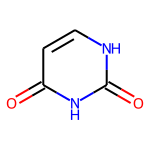

Oc1ccnc(O)n1


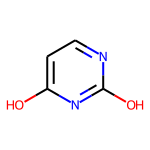

O=c1nc(O)cc[nH]1


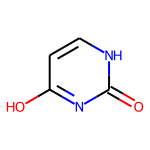

O=c1nccc(O)[nH]1


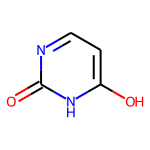

O=c1ccnc(O)[nH]1


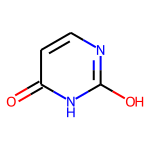

O=c1cc[nH]c(O)n1


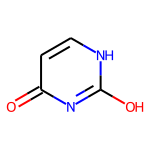

In [78]:
from rdkit.Chem import Draw

for mysmiles in unique_smiles_freq.keys() :
    if mysmiles != "" :
        print(mysmiles)
        img = Draw.MolToImage( Chem.MolFromSmiles(mysmiles), size=(150, 150) )
        display(img)

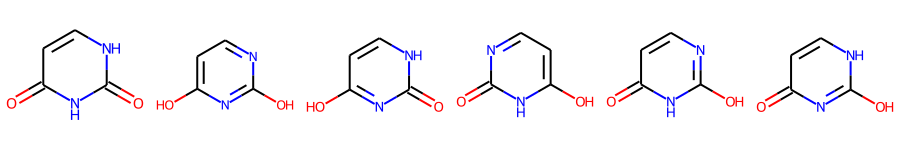

In [79]:
index = 1
for mysmiles in unique_smiles_freq.keys() :
  if mysmiles != "" :
        filename = 'image' + str(index) +'.png'
        Draw.MolToFile( Chem.MolFromSmiles(mysmiles), filename )
        index += 1

from PIL import Image
images = []
for mysmiles in unique_smiles_freq.keys() :
  if mysmiles != "" :
    img = Draw.MolToImage( Chem.MolFromSmiles(mysmiles), size=(150, 150) )
    images.append(img)
big_img = Image.new('RGB', (900,150))  # enought to arrange six 150x150 images
for i in range(0,len(images)):
    big_img.paste(images[i], (i*150, 0 ) )
    
display(big_img)
big_img.save('image_grid.png')
 


In [52]:
res = requests.get('https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/1174/property/isomericsmiles/txt')

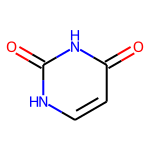

In [54]:
img = Draw.MolToImage( Chem.MolFromSmiles( res.text.rstrip() ), size=(150, 150) )
img

In [55]:
from IPython.display import Image
Image(url='https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/1174/record/PNG?image_size=300x300')


In [190]:
#the sub

pr_input  = "compound/cid/129825914"
pr_oper   = "sids"
pr_output = "txt"
url       = prolog + '/' + pr_input + '/' + pr_oper + '/' + pr_output
res = requests.get(url)
print(res.text)

341669951



In [191]:
pugin   = "compound/cid/129825914,129742624,129783988"
pugoper = "sids"
pugout  = "txt"
url     = prolog + '/' + pugin + '/' + pugoper + '/' + pugout
res = requests.get(url)
print(res.text)

pugin   = "compound/cid/129825914,129742624,129783988"
pugoper = "sids"
pugout  = "json"
pugopt  = "list_return=grouped"  #or list_return=flat

url     = prolog + '/' + pugin + '/' + pugoper + '/' + pugout + "?" + pugopt
res = requests.get(url)
print(res.text)

341669951
341492923
341577059
368769438

{
  "InformationList": {
    "Information": [
      {
        "CID": 129825914,
        "SID": [
          341669951
        ]
      },
      {
        "CID": 129742624,
        "SID": [
          341492923
        ]
      },
      {
        "CID": 129783988,
        "SID": [
          341577059,
          368769438
        ]
      }
    ]
  }
}



In [194]:
url = 'https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/lactose/sids/txt'
res = requests.get(url)
cids = res.text.split()
print("# CIDs returned:", len(cids))
print(",".join(cids))

# CIDs returned: 197
5071,583808,821154,821234,821239,822912,822914,824498,828319,833660,837295,841577,3156979,7846021,7886175,7886176,7887733,7887738,7887846,7888611,8153845,14717757,14720284,15123295,24277294,24896352,24896505,26711090,26736673,29225137,46391476,46392050,46392060,46393700,48416152,49857055,50064003,56458849,57323212,57410664,75611598,85239853,85239855,85239865,92297936,97857541,104170945,104170947,104234182,104311205,117687278,125310778,125310826,126674307,126677893,128006250,131320273,131349745,135048007,139848045,141559928,143491542,144212183,152090081,152188276,152237999,160643899,160849555,162087669,162163090,163831306,165248496,170481250,170481920,173905773,179316030,198975889,223426661,223675434,223677000,223745456,241177058,241177080,242083144,242659181,242659182,242659183,242659184,242659212,244101195,249493527,249737888,252082454,252082459,252082465,252082471,252082472,252287609,252370532,252493354,254037774,254037778,254792660,257139582,274900053,310104204,

In [195]:
url = prolog + "/compound/name/tylenol/cids/txt?cids_type=component"
res = requests.get(url)
cids = res.text.split()
print(len(cids))

503


In [196]:
#for getting the active compounds in a given assay
url = prolog + "/assay/aid/" + "1207599" + "/cids/txt?cids_type=active"
res = requests.get(url)
cids = res.text.split()
print(len(cids))
print(cids)

435
['6197', '10219', '14169', '17558', '68050', '177894', '182792', '253602', '348623', '453048', '456183', '458959', '463795', '467892', '467895', '467898', '467900', '540335', '628093', '697239', '701785', '742641', '745456', '807557', '826140', '972880', '973099', '1092462', '1104215', '1104245', '1187199', '1253822', '1272562', '1330474', '1507416', '1591101', '1929483', '1931935', '2226126', '2229100', '2454286', '2526359', '2788193', '2826655', '2840340', '2840651', '2865851', '2871881', '2876588', '2877655', '2895488', '2897031', '2900550', '2917883', '2918568', '2923731', '2946841', '3010592', '3020289', '3098392', '3114195', '3124081', '3124283', '3304735', '3351585', '3732278', '4524296', '4827679', '4970781', '5065884', '5311382', '5322214', '5322341', '5328733', '6404647', '6603435', '7086352', '7292609', '7292627', '7292667', '7292689', '7294801', '7294819', '9549410', '9549480', '9802843', '10066728', '10173796', '10215271', '10237991', '10432767', '11237028', '11534555'

In [197]:
#getting the canonical SMILES given a lis
names = [ 'cytosine', 'benzene', 'motrin', 'aspirin', 'zolpidem' ]

pugrest = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
pugoper = "property/CanonicalSMILES"
pugout  = "txt"

for myname in names:    # loop over each element in the "names" list
    
    pugin = "compound/name/" + myname
    
    url = "/".join( [pugrest, pugin, pugoper, pugout] )
    res = requests.get(url)
    print(myname, ":", res.text)

cytosine : C1=C(NC(=O)N=C1)N

benzene : C1=CC=CC=C1

motrin : CC(C)CC1=CC=C(C=C1)C(C)C(=O)O

aspirin : CC(=O)OC1=CC=CC=C1C(=O)O

zolpidem : CC1=CC=C(C=C1)C2=C(N3C=C(C=CC3=N2)C)CC(=O)N(C)C



In [198]:
import time
names=['alanine', 'arginine', 'asparagine', 'aspartate', 'cysteine', 'glutamine', 'glycine', 'proline', 'serine', 'tyrosine']
pugrest = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
pugoper = "property/CanonicalSMILES"
pugout  = "txt"
for i in range(len(names)):    # loop over each index (position) in the "names" list
    pugin = "compound/name/" + names[i]    # names[i] = the ith element in the names list.
    url = "/".join( [pugrest, pugin, pugoper, pugout] )
    res = requests.get(url)
    print(names[i], ":", res.text)
    if ( i % 5 == 4 ) :  # the % is the modulo operator and returns the remainder of a calculation (if i = 4, 9, ...)
        time.sleep(1)

alanine : CC(C(=O)O)N
CC(C(=O)O)[NH3+]
CC(C(=O)[O-])[NH3+]
[CH2-]C(C(=O)O)N

arginine : C(CC(C(=O)O)N)CN=C(N)N

asparagine : C(C(C(=O)O)N)C(=O)N

aspartate : C(C(C(=O)O)N)C(=O)O
C(C(C(=O)[O-])N)C(=O)[O-]
C(C(C(=O)[O-])[NH3+])C(=O)[O-]

cysteine : C(C(C(=O)O)N)S
C(C(C(=O)O)N)S.Cl
C(C(C(=O)[O-])[NH3+])S
C(C(C(=O)O)N)[S-]
C(C(C(=O)O)[NH3+])S

glutamine : C(CC(=O)N)C(C(=O)O)N

glycine : C(C(=O)O)N

proline : C1CC(NC1)C(=O)O

serine : C(C(C(=O)O)N)O

tyrosine : C1=CC(=CC=C1CC(C(=O)O)N)O



## Experimenting with different types of search

* same_connectivity: returns compounds with the same atom connectivity as the query molecule, ignoring stereochemistry and isotope information.
* same_isotope: returns compounds with the same isotopes (as well as the same atom connectivity) as the query molecule. Stereochemistry will be ignored.
* same_stereo: returns compounds with the same stereochemistry (as well as the same atom connectivity) as the query molecule. Isotope information will be ignored.
* same_stereo_isotope: returns compounds with the same stereochemistry AND isotope information (as well as the same atom connectivity). This is the default.

In [8]:
import requests
import time
import io
from rdkit import Chem
from rdkit.Chem import Draw



In [10]:
prolog = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
mydata = { 'smiles' : 'C(/C=C/Cl)Cl' }
options = [ 'same_stereo_isotope', # This is the default
            'same_stereo',
            'same_isotope',
            'same_connectivity']


#### Identity_type: same_stereo_isotope
24726 "C(/C=C/Cl)Cl"


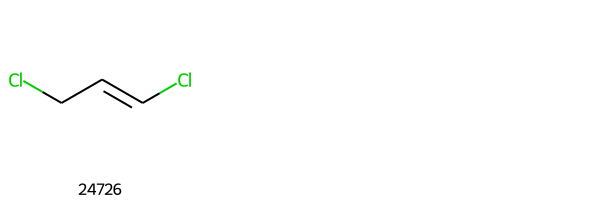

#### Identity_type: same_stereo
24726 "C(/C=C/Cl)Cl"
102602172 "[2H]/C(=C(/[2H])\Cl)/C([2H])([2H])Cl"


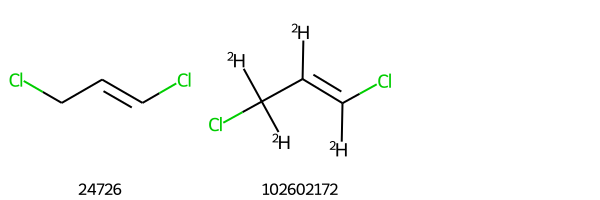

#### Identity_type: same_isotope
24726 "C(/C=C/Cl)Cl"
24883 "C(C=CCl)Cl"
5280970 "C(/C=C\Cl)Cl"


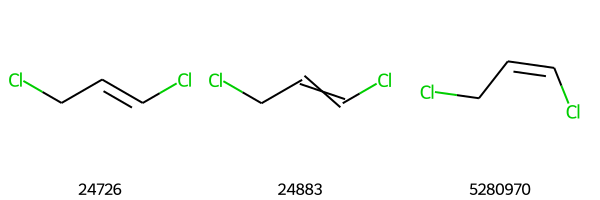

#### Identity_type: same_connectivity
24726 "C(/C=C/Cl)Cl"
24883 "C(C=CCl)Cl"
5280970 "C(/C=C\Cl)Cl"
102602172 "[2H]/C(=C(/[2H])\Cl)/C([2H])([2H])Cl"
131875718 "[2H]C(=C([2H])Cl)C([2H])([2H])Cl"


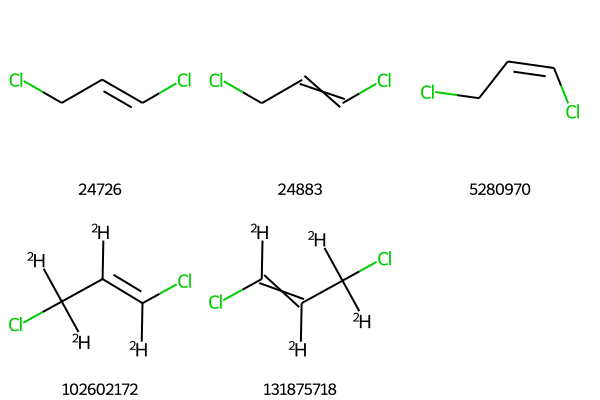

In [15]:
for myoption in ( options ) :
    print("#### Identity_type:", myoption)
    url = prolog + '/compound/fastidentity/smiles/property/isomericsmiles/csv?identity_type=' + myoption
    res = requests.post(url, data=mydata)
    mycids = []
    mysmiles = []
    file = io.StringIO(res.text)
    file.readline() 
    for line in file:
        cid_tmp, smiles_tmp = line.rstrip().split(',')
        print(cid_tmp, smiles_tmp)
        mycids.append( cid_tmp )
        mysmiles.append(smiles_tmp.replace('"',""))
    mols=[]
    for x in mysmiles: 
        mol=Chem.MolFromSmiles(x)
        Chem.FindPotentialStereoBonds(mol)
        mols.append(mol)
    img=Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(200,200), legends=mycids)
    display(img)
    time.sleep(0.2)


## Similarity search

###2D similarity

In [17]:
mydata = { 'smiles' : "C1COCC(=O)N1C2=CC=C(C=C2)N3C[C@@H](OC3=O)CNC(=O)C4=CC=C(S4)Cl" }

url = prolog + "/compound/fastsimilarity_2d/smiles/cids/txt?Threshold=99"
res = requests.post(url,data=mydata)
cids = res.text.split()

print("# Number of CIDs:", len(cids))
print(cids)




# Number of CIDs: 36
['9875401', '6433119', '11524901', '25255944', '159596345', '154630277', '145624246', '145624236', '144489887', '143433422', '123868009', '68152323', '56598114', '56589668', '25190310', '25164166', '11994745', '25190129', '25190130', '25190186', '25190187', '25190188', '25190189', '25190190', '25190248', '25190249', '25190250', '25190251', '25190252', '25190311', '25255845', '25255945', '25255946', '49849874', '133687098', '156594383']


In [22]:
url1 = prolog + "/compound/fastsimilarity_2d/smiles/cids/txt?Threshold=95"
url2 = prolog + "/compound/fastsimilarity_2d/smiles/cids/txt?threshold=95"
res1 = requests.post(url1,data=mydata)
res2 = requests.post(url2,data=mydata)

print(res1.text.split())
cids1 = res1.text.split()
cids2 = res2.text.split()

print("# Number of CIDs:", len(cids1), "vs.", len(cids2))


['9875401', '6433119', '11524901', '25255944', '145708388', '131667832', '131667831', '78358408', '76072855', '60172452', '21070732', '11525292', '11518043', '10273747', '10138114', '144576639', '134817263', '123139150', '88286117', '86710485', '69514333', '58348057', '58348047', '58348046', '58348043', '25169270', '25169142', '25168059', '25168057', '25168055', '25135309', '25108835', '21070745', '21070709', '11554212', '164027141', '164026015', '163994570', '163926531', '163897094', '163782118', '163429221', '159596345', '154630277', '153169091', '148744256', '145624266', '145624256', '145624246', '145624241', '145624236', '145623399', '145552435', '145226400', '144489887', '144475303', '144345624', '144232433', '144213678', '143764301', '143631770', '143631766', '143525423', '143525420', '143525419', '143525414', '143433422', '141230696', '140095519', '135215960', '129168159', '129132122', '129065266', '126635428', '126510463', '123986018', '123968013', '123951526', '123868009', '12

###3D Similarity

Note that similarity search can take considerably longer

It uses a shape-Tanimoto(ST) of >-0.80 and a color-Tanimoto(CT) of >=0.50 as a similarity treshold instead of the previous treshold 

In [23]:

mydata = { 'smiles' : "[C@@H]23C(=O)[C@H](N)C(C)[C@H](CCC1=COC=C1)[C@@]2(C)CCCC3(C)C" }


In [34]:
mydata = { 'smiles' : 'CC(=O)OC1=CC=CC=C1C(=O)O' }

url = prolog + "/compound/fastsimilarity_3d/smiles/cids/txt"
res = requests.post(url,data=mydata)
cids = res.text.split()

print("# Number of CIDs:", len(cids))
print(cids)

# Number of CIDs: 2994
['90936565', '71309054', '46780045', '12280114', '2244', '21899749', '157520', '18681509', '12031533', '16716', '13182927', '10442271', '5311473', '3434975', '132564697', '6971', '21201505', '10702511', '12433720', '3003572', '129793510', '67766', '18183427', '13140652', '3414364', '11890', '12507933', '54244160', '66643', '129925127', '40486904', '278262', '12407504', '23251958', '15278258', '78094', '10176491', '21692063', '2737622', '235160', '2798306', '2735827', '2735826', '101399', '141913572', '2777223', '53487958', '18620818', '5705655', '2752991', '2752990', '348589', '131922', '23448324', '21452925', '18452830', '129857165', '5460071', '4777955', '10710', '15291003', '12194907', '11194839', '12866696', '12357674', '10511603', '21821866', '91619586', '260922', '237228', '80184', '19689795', '2820813', '58844902', '134148540', '131772', '73922', '540373', '23340247', '12639204', '6918960', '45089302', '54188135', '22064450', '14087860', '11637223', '32646

##Substructure/Superstructure Search

In [36]:
query = 'C12(SCC(=C(N1C([C@H]2NC(=O)[*])=O)C(=O)O[H])[*])[H]'
mydata = { 'smiles' : query }
url = prolog + "/compound/fastsubstructure/smiles/cids/txt?Stereo=exact"
res = requests.post(url, data=mydata)
cids = res.text.split()
print("# Number of CIDs:", len(cids))
print(cids)


# Number of CIDs: 25851
['6328657', '5484735', '5479529', '71309', '38103', '33255', '30699', '27447', '19150', '6024', '16212182', '6915944', '6533629', '5742673', '5479530', '5362065', '5282242', '51039', '47965', '44187', '43708', '6335986', '5361202', '5281006', '456255', '65536', '47896', '43507', '41375', '24868283', '20848883', '9937686', '9870843', '9570757', '6399253', '5479527', '5284529', '636405', '91562', '51038', '43594', '135413542', '11954009', '6914282', '6398970', '6321411', '5284527', '167441', '54362', '47964', '155292829', '131673973', '88046200', '87900910', '87716431', '87060529', '56841980', '52918380', '11655595', '9571075', '6604438', '6436628', '6410758', '5491295', '5487888', '5361486', '65755', '62921', '135456161', '90437953', '71306765', '57514685', '54121176', '49863419', '16219159', '15942748', '9951998', '9915819', '9894479', '9578573', '9577223', '6336480', '6321413', '5491577', '5491294', '5361919', '5361848', '5282241', '456256', '166592', '92088', 

##Molecular Formula Search 

In [39]:
query = 'C22H28FN3O6S'
url = prolog + "/compound/fastformula/"+ query + "/cids/txt"
res = requests.get(url)
cids = res.text.split()
print("# Number of CIDs:", len(cids))
print(cids)


# Number of CIDs: 203
['446157', '6439133', '118988808', '12136803', '4979943', '656606', '118988812', '67022109', '54639947', '54639946', '54639945', '54639944', '54639943', '54639942', '54639941', '54639940', '6239562', '129806', '155317389', '155317386', '155107236', '154149632', '146353190', '144199007', '143305133', '142756494', '142756493', '142727968', '142175996', '141625068', '141597421', '137380749', '136629448', '129850360', '129850340', '129850335', '124128296', '122444882', '117911168', '102274675', '91591524', '91571993', '91492122', '91433585', '91425214', '91345552', '91230150', '91179466', '91146810', '91094560', '90911029', '90842570', '90828679', '90116753', '90116386', '89610376', '88037905', '87932369', '87833241', '87707820', '87666242', '87658164', '87634271', '87587801', '87587799', '87393492', '87392903', '87285484', '85332042', '76673978', '75964998', '70240861', '69777636', '69648208', '69648207', '69576289', '69496056', '69292144', '69253231', '69085665', '6

In [40]:
url = prolog + "/compound/fastformula/"+ query + "/cids/txt?AllowOtherElements=true"
res = requests.get(url)
cids = res.text.split()
print("# Number of CIDs:", len(cids))


# Number of CIDs: 227


##Moelecular Descriptors

In [43]:
from rdkit import Chem                            # imports the Chem module from rdkit
from mordred import Calculator, descriptors       # imports mordred descriptor library
calc = Calculator(descriptors, ignore_3D=True)    # sets up a function reading descriptors
len(calc.descriptors)

1613

In [61]:
print(calc.descriptors)
#dir(Calculator(descriptors, ignore_3D=True))
#Calculator(descriptors, ignore_3D=True).__class__.__dict__

(mordred.ABCIndex.ABCIndex(), mordred.ABCIndex.ABCGGIndex(), mordred.AcidBase.AcidicGroupCount(), mordred.AcidBase.BasicGroupCount(), mordred.AdjacencyMatrix.AdjacencyMatrix('SpAbs'), mordred.AdjacencyMatrix.AdjacencyMatrix('SpMax'), mordred.AdjacencyMatrix.AdjacencyMatrix('SpDiam'), mordred.AdjacencyMatrix.AdjacencyMatrix('SpAD'), mordred.AdjacencyMatrix.AdjacencyMatrix('SpMAD'), mordred.AdjacencyMatrix.AdjacencyMatrix('LogEE'), mordred.AdjacencyMatrix.AdjacencyMatrix('VE1'), mordred.AdjacencyMatrix.AdjacencyMatrix('VE2'), mordred.AdjacencyMatrix.AdjacencyMatrix('VE3'), mordred.AdjacencyMatrix.AdjacencyMatrix('VR1'), mordred.AdjacencyMatrix.AdjacencyMatrix('VR2'), mordred.AdjacencyMatrix.AdjacencyMatrix('VR3'), mordred.Aromatic.AromaticAtomsCount(), mordred.Aromatic.AromaticBondsCount(), mordred.AtomCount.AtomCount('Atom'), mordred.AtomCount.AtomCount('HeavyAtom'), mordred.AtomCount.AtomCount('Spiro'), mordred.AtomCount.AtomCount('Bridgehead'), mordred.AtomCount.AtomCount('Hetero'), m

####Wiener Index

In [59]:
from mordred import WienerIndex
pentane = Chem.MolFromSmiles('CCCCC')                  # Use rdkit to create a mol file from the smiles string for n-pentane
methyl_pentane = Chem.MolFromSmiles('CCCC(C)C')        #  and for 2-methylpentane
wiener_index = WienerIndex.WienerIndex()               # create descriptor instance for Wiener index
result1 = wiener_index(pentane)                        # calculate wiener index for n-pentane
result2 = wiener_index(methyl_pentane)                 #  and for 2-methylpentane
print("The Wiener index for n-pentane is: ", result1)  # display result
print("The Wiener index for 2-methylpentane is: ", result2)

The Wiener index for n-pentane is:  20
The Wiener index for 2-methylpentane is:  32


#### Zagreb Indices

In [62]:
from mordred import ZagrebIndex

zagreb_index1 = ZagrebIndex.ZagrebIndex(version = 1)            # create descriptor instance for Zagreb index 1
zagreb_index2 = ZagrebIndex.ZagrebIndex(version = 2)            # create descriptor instance for Zagreb index2

result_Z1 = zagreb_index1(pentane)                              # calculate Z1 descriptor value for n-pentane
result_Z2 = zagreb_index2(pentane)                              # calculate Z2 descriptor value for n-pentane
print("The Zagreb index 1 for n-pentane is:", result_Z1)
print("The Zagreb index 2 for n-pentane is:", result_Z2)

result_Z1 = zagreb_index1(methyl_pentane)                       # and for 2-methylpentane as well
result_Z2 = zagreb_index2(methyl_pentane)                      
print("The Zagreb index 1 for 2-methylpentane is:", result_Z1)
print("The Zagreb index 2 for 2-methylpentane is:", result_Z2)

The Zagreb index 1 for n-pentane is: 14.0
The Zagreb index 2 for n-pentane is: 12.0
The Zagreb index 1 for 2-methylpentane is: 20.0
The Zagreb index 2 for 2-methylpentane is: 18.0


In [63]:
smiles = ["CCC", "CCCC", "CCCCC", "CCCC(C)C","CC(C)C(C)C"]         #store smiles strings in a list

for smile in smiles:
    mol = Chem.MolFromSmiles(smile)                      # convert smiles string to mol file
    result_Z1 = zagreb_index1(mol)                       # calculate Z1 descriptor value
    result_Z2 = zagreb_index2(mol)                       # calculate Z2 descriptor value
    print("The Zagreb index 1 for", smile, "is:", result_Z1)
    print("The Zagreb index 2 for", smile, "is:", result_Z2)
    print()

The Zagreb index 1 for CCC is: 6.0
The Zagreb index 2 for CCC is: 4.0

The Zagreb index 1 for CCCC is: 10.0
The Zagreb index 2 for CCCC is: 8.0

The Zagreb index 1 for CCCCC is: 14.0
The Zagreb index 2 for CCCCC is: 12.0

The Zagreb index 1 for CCCC(C)C is: 20.0
The Zagreb index 2 for CCCC(C)C is: 18.0

The Zagreb index 1 for CC(C)C(C)C is: 22.0
The Zagreb index 2 for CC(C)C(C)C is: 21.0



####Using descriptors to predict molecular properties

In [80]:
import pandas as pd        # import the Python Data Analysis Library with the shortened name pd
df = pd.read_csv("BP.CSV") # read in the file into a pandas dataframe
df                         # print the dataframe

,compound,name,BP_C,BP_K,SMILES,MW
0,1,Methane,-162.2,110.95,C,16.043
1,2,Ethane,-88.6,184.55,CC,30.070
2,3,propane,-42.2,230.95,CCC,44.100
3,4,butane,-0.1,273.05,CCCC,58.120
4,5,2-methylpropane,-11.2,261.95,CC(C)C,58.120
5,6,pentane,36.1,309.25,CCCCC,72.150
6,7,2-methylbutane,27.0,300.15,CC(C)CC,72.150
7,8,"2,2-dimethylpropane",9.5,282.65,CC(C)(C)C,72.150
8,9,hexane,68.8,341.95,CCCCCC,86.180
9,10,2-methylpentane,60.9,334.05,CC(C)CCC,86.180


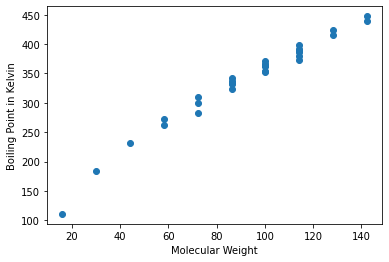

In [81]:
import matplotlib.pyplot as plt

plt.scatter(df.MW, df.BP_K)     # plot of boiling point (in K) vs molecular weight
plt.xlabel('Molecular Weight')
plt.ylabel('Boiling Point in Kelvin')
plt.show()

In [82]:
# create new lists to store results we calculate
result_Wiener= []
result_Z1= []
result_Z2= []

for index, row in df.iterrows():                # iterate through each row of the CSV data
    SMILE = row['SMILES']                       # get SMILES string from row
    mol = Chem.MolFromSmiles(SMILE)             # convert smiles string to mol file
    result_Wiener.append(wiener_index(mol))     # calculate Wiener index descripter value
    result_Z1.append(zagreb_index1(mol))        # calculate zagreb (Z1) descriptor value
    result_Z2.append(zagreb_index2(mol))        # calculate zagreb (Z2) descriptor value

df['Wiener'] = result_Wiener           # add the results for WienerIndex to dataframe
df['Z1'] = result_Z1                   # add the results for Zagreb 1 to dataframe
df['Z2'] = result_Z2                   # add the results for Zagreb 2 to dataframe
df      

,compound,name,BP_C,BP_K,SMILES,MW,Wiener,Z1,Z2
0,1,Methane,-162.2,110.95,C,16.043,0,0.0,0.0
1,2,Ethane,-88.6,184.55,CC,30.070,1,2.0,1.0
2,3,propane,-42.2,230.95,CCC,44.100,4,6.0,4.0
3,4,butane,-0.1,273.05,CCCC,58.120,10,10.0,8.0
4,5,2-methylpropane,-11.2,261.95,CC(C)C,58.120,9,12.0,9.0
5,6,pentane,36.1,309.25,CCCCC,72.150,20,14.0,12.0
6,7,2-methylbutane,27.0,300.15,CC(C)CC,72.150,18,16.0,14.0
7,8,"2,2-dimethylpropane",9.5,282.65,CC(C)(C)C,72.150,16,20.0,16.0
8,9,hexane,68.8,341.95,CCCCCC,86.180,35,18.0,16.0
9,10,2-methylpentane,60.9,334.05,CC(C)CCC,86.180,32,20.0,18.0


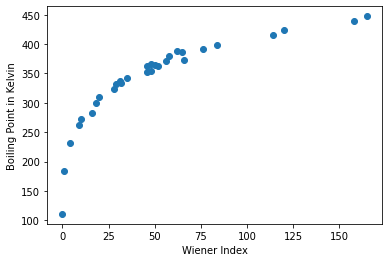

In [83]:
plt.scatter(df.Wiener, df.BP_K) # plot of BP versus Wiener index
plt.xlabel('Wiener Index')
plt.ylabel('Boiling Point in Kelvin')
plt.show()

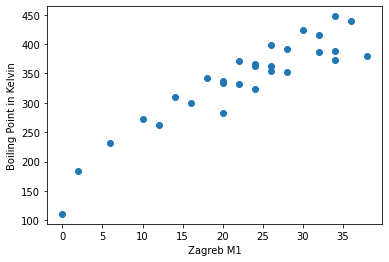

In [84]:
plt.scatter(df.Z1, df.BP_K) # plot of BP versus Zagreb M1
plt.xlabel('Zagreb M1')
plt.ylabel('Boiling Point in Kelvin')
plt.show()

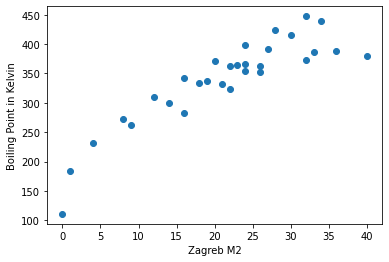

In [85]:
plt.scatter(df.Z2, df.BP_K) # plot of BP versus Zagreb M2
plt.xlabel('Zagreb M2')
plt.ylabel('Boiling Point in Kelvin')
plt.show()

In [87]:
df.to_csv('bp_descriptor_data.csv', encoding='utf-8', index=False)
df

,compound,name,BP_C,BP_K,SMILES,MW,Wiener,Z1,Z2
0,1,Methane,-162.2,110.95,C,16.043,0,0.0,0.0
1,2,Ethane,-88.6,184.55,CC,30.070,1,2.0,1.0
2,3,propane,-42.2,230.95,CCC,44.100,4,6.0,4.0
3,4,butane,-0.1,273.05,CCCC,58.120,10,10.0,8.0
4,5,2-methylpropane,-11.2,261.95,CC(C)C,58.120,9,12.0,9.0
5,6,pentane,36.1,309.25,CCCCC,72.150,20,14.0,12.0
6,7,2-methylbutane,27.0,300.15,CC(C)CC,72.150,18,16.0,14.0
7,8,"2,2-dimethylpropane",9.5,282.65,CC(C)(C)C,72.150,16,20.0,16.0
8,9,hexane,68.8,341.95,CCCCCC,86.180,35,18.0,16.0
9,10,2-methylpentane,60.9,334.05,CC(C)CCC,86.180,32,20.0,18.0


    Predicted BP = 4.4325 * MW - 0.6411 * Weiner - 4.3920 * Z1 + 0.2982 * Z2 + 55.5695


In [89]:
import statsmodels.api as sm           # import the statsmodels library as sm
X = df[["MW", "Wiener", "Z1", "Z2"]]   # select our independent variables
X = sm.add_constant(X)                 # add an intercept to our model
y = df[["BP_K"]]                       # select BP as our dependent variable
model = sm.OLS(y,X).fit()              # set up our model
predictions = model.predict(X)         # make the predictions
print(model.summary())   

                            OLS Regression Results                            
Dep. Variable:                   BP_K   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1124.
Date:                Wed, 24 Aug 2022   Prob (F-statistic):           8.16e-28
Time:                        13:21:29   Log-Likelihood:                -93.019
No. Observations:                  30   AIC:                             196.0
Df Residuals:                      25   BIC:                             203.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.5695      6.745      8.238      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


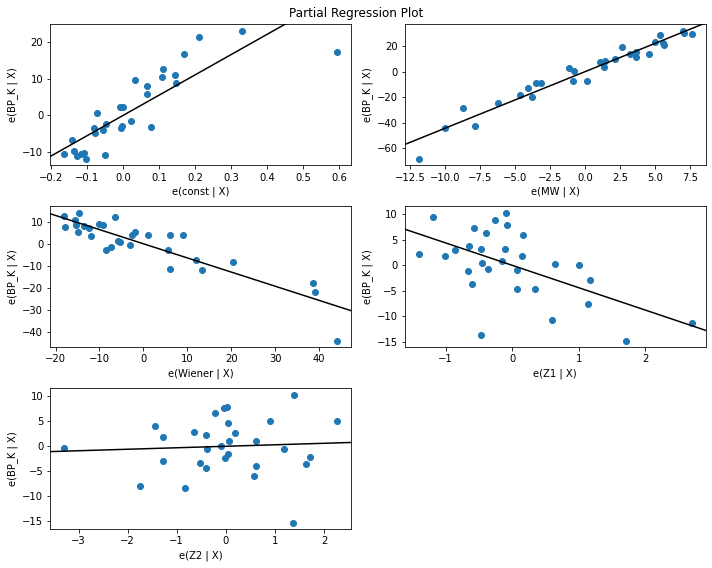

In [90]:
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

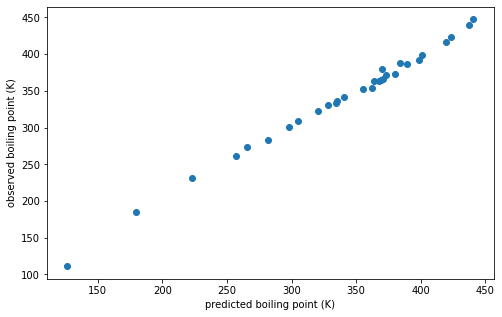

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.213e+05
Date:                Wed, 24 Aug 2022   Prob (F-statistic):                    4.52e-54
Time:                        13:23:36   Log-Likelihood:                         -93.015
No. Observations:                  30   AIC:                                      188.0
Df Residuals:                      29   BIC:                                      189.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [91]:
pred_bp = model.fittedvalues.copy()       # use our model to create a set of predicted bp's
fig, ax = plt.subplots(figsize=(8, 5))
lmod = sm.OLS(pred_bp, df.BP_K)           # linear regression of observed vs predicted bp's
res = lmod.fit()                          # run fitting
plt.scatter(pred_bp, df.BP_K)             # plot of of observed vs predicted bp's
plt.ylabel('observed boiling point (K)')
plt.xlabel('predicted boiling point (K)')
plt.show()
print(res.summary())                      # print linear regression stats summary

In [92]:
import statsmodels.api as sm           # import the statsmodels library as sm
X = df[["MW", "Wiener", "Z1"]]         # select our independent variables, this time without Z2
X = sm.add_constant(X)                 # add an intercept to our model
y = df[["BP_K"]]                       # select BP as our dependent variable
model = sm.OLS(y,X).fit()              # set up our model
predictions = model.predict(X)         # make the predictions
print(model.summary())  

                            OLS Regression Results                            
Dep. Variable:                   BP_K   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1552.
Date:                Wed, 24 Aug 2022   Prob (F-statistic):           1.99e-29
Time:                        13:24:42   Log-Likelihood:                -93.078
No. Observations:                  30   AIC:                             194.2
Df Residuals:                      26   BIC:                             199.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.4979      6.624      8.378      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Fingerprint Generation

In [94]:
from rdkit import Chem
mol = Chem.MolFromSmiles('CC(C)C1=C(C(=C(N1CC[C@H](C[C@H](CC(=O)O)O)O)C2=CC=C(C=C2)F)C3=CC=CC=C3)C(=O)NC4=CC=CC=C4')

In [96]:
from rdkit.Chem import MACCSkeys
fp = MACCSkeys.GenMACCSKeys(mol)

In [98]:
print(type(fp))

for i in range(len(fp)):
    print(fp[i], end='')

fp.ToBitString()    # Alternative, easier way to convert it to a bitstring
print(fp.GetNumBits())
print(fp.GetNumOffBits())
print(fp.GetNumOnBits())
print(fp.ToBinary())

<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
00000000000000000000000000000000000000000010000000000100000000100100000000110000100101010111100011001000100110110000011001110100110111111101101011111111111111111111110167
105
62
b'\xe0\xff\xff\xff\xa7\x00\x00\x00>\x00\x00\x00T\x14\x10\x04\x10\x00\x08\x04\x02\x02\x02\x00\x00\x00\x06\x00\x04\x06\x04\x00\x02\x00\n\x00\x04\x00\x00\x02\x04\x00\x02\x00\x00\x00\x00\x00\x00\x02\x00\x02\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02'


In [100]:
from rdkit.Chem import AllChem
fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024).ToBitString()
print(fp)

0100000000000000000000000000010001100000000000000000010000000000100000000000000010000000001000000000000000000100000001000100000010000000100000000000000010000000000000000100000100000000000000010000000000000000000000000000000000010000000000000000000000000000000000000010000000000000000100000100000000000000000000000000000000000000000000000000000000000001000010010000000000000000000000000010010000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000100000000000000000000000001000000000000000000000100010000000000000000000000000010010000000000000000001000100000000010000000001001000000000100100000000000000000000000000000000000000000000000000001000000000100001000000000000000000000000000000000000000001000000000000000000000000000000000000000000010010000000100000000000000000000000000000010000000000000000001000000000000000000100000000000000000000000000

In [102]:
from rdkit.Chem import rdmolops
fp = rdmolops.RDKFingerprint(mol, fpSize=2048, minPath=1, maxPath=7).ToBitString()
print(fp)

1101110111110101011111001011111010111101111010011111111111011100111111110110111101111111111110111111101111110111110101001011011101111101111111111101101101111110111000110111111100011001010111111111011011101101011111010111110111100111111101111110111111001110111011101001011000111000111101100111111000111111100111101111111000010000111110111111011111111100011111111111111011100101011101111111110111101111101000011011010111111111011111101110011101111011011101011111101111111110111111011101101110111111111101111111111111101111010010001111111111011010111011000110111110111011110101111010111111110101001001111001011110111011001100001111011101111111111011111111011110111100100001110100111111111001110110101111100101110100111101101101111101111111111111111101110111000011101111101111011111010100111100111011111111111111110110111111011010111111100111100110110110011111110011110110101011111100010111110110111111111011011111111101111101101111111101111110101110101001001110110110111011111001111100001110101111001111

In [103]:
from base64 import b64decode

def PCFP_BitString(pcfp_base64) :

    pcfp_bitstring = "".join( ["{:08b}".format(x) for x in b64decode( pcfp_base64 )] )[32:913]
    return pcfp_bitstring
    

In [105]:
pcfps = 'AAADcYBgAAAAAAAAAAAAAAAAAAAAAAAAAAAwAAAAAAAAAAABAAAAGAAAAAAACACAEAAwAIAAAACAACBCAAACAAAgAAAIiAAAAIgIICKAERCAIAAggAAIiAcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA=='

In [106]:
print( len(PCFP_BitString(pcfps)) )
print(PCFP_BitString(pcfps))

881
10000000011000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001100000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000001100000000000000000000000000000000000000000000000100000000000100000000001000000000000001100000000000010000000000000000000000000000000100000000000000000100000010000100000000000000000000000100000000000000000001000000000000000000000000010001000100000000000000000000000000010001000000010000010000000100010100000000001000100010000100000000010000000000000001000001000000000000000000010001000100000000111000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


In [107]:
from rdkit import DataStructs
bitvect = DataStructs.CreateFromBitString(PCFP_BitString(pcfps))
type(bitvect)

rdkit.DataStructs.cDataStructs.ExplicitBitVect

In [108]:
prolog = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"

str_cid = ",".join([ str(x) for x in cids])

url = prolog + "/compound/cid/" + str_cid + "/property/isomericsmiles/txt"
res = requests.get(url)
smiles = res.text.split()

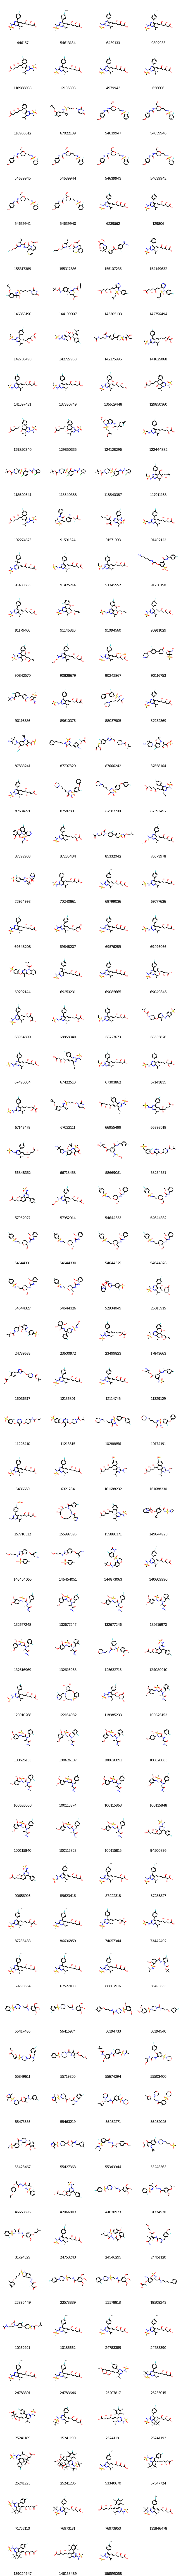

In [109]:
from rdkit import Chem
from rdkit.Chem import Draw

mols = [ Chem.MolFromSmiles(x) for x in smiles ]
Chem.Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(200,200), legends=[str(x) for x in cids] )

In [111]:
from rdkit import DataStructs
from rdkit.Chem import MACCSkeys

fps = [ MACCSkeys.GenMACCSKeys(x) for x in mols ]

In [112]:
for i in range(0, len(fps)) :
    for j in range(i+1, len(fps)) :
        
        score = DataStructs.FingerprintSimilarity(fps[i], fps[j])
        print(cids[i], "vs.", cids[j], ":", round(score,3), end='')
        
        if ( score >= 0.85 ):
            print(" ****")
        elif ( score >= 0.75 ):
            print(" ***")
        elif ( score >= 0.65 ):
            print(" **")
        elif ( score >= 0.55 ):
            print(" *")
        else:
            print(" ")


Streaming output truncated to the last 5000 lines.
10288856 vs. 56416974 : 0.766 ***
10288856 vs. 56194733 : 0.774 ***
10288856 vs. 56194540 : 0.793 ***
10288856 vs. 55849611 : 0.739 **
10288856 vs. 55719320 : 0.684 **
10288856 vs. 55674294 : 0.546 
10288856 vs. 55503400 : 0.777 ***
10288856 vs. 55473535 : 0.684 **
10288856 vs. 55463219 : 0.704 **
10288856 vs. 55452271 : 0.767 ***
10288856 vs. 55452025 : 0.767 ***
10288856 vs. 55428467 : 0.761 ***
10288856 vs. 55427363 : 0.684 **
10288856 vs. 55343944 : 0.674 **
10288856 vs. 53248563 : 0.577 *
10288856 vs. 46653596 : 0.656 **
10288856 vs. 42066903 : 0.525 
10288856 vs. 41620973 : 0.761 ***
10288856 vs. 31724520 : 0.613 *
10288856 vs. 31724329 : 0.663 **
10288856 vs. 24758243 : 0.51 
10288856 vs. 24546295 : 0.67 **
10288856 vs. 24451120 : 0.505 
10288856 vs. 22895449 : 0.674 **
10288856 vs. 22578839 : 0.729 **
10288856 vs. 22578818 : 0.729 **
10288856 vs. 18508243 : 0.674 **
10288856 vs. 10162921 : 0.607 *
10288856 vs. 10185662 : 0.505 

In [113]:
print("Tanimoto    :", round(DataStructs.TanimotoSimilarity(fps[0], fps[1]), 4))
print("Dice        :", round(DataStructs.DiceSimilarity(fps[0], fps[1]), 4))
print("Cosine      :", round(DataStructs.CosineSimilarity(fps[0], fps[1]), 4))
print("Sokal       :", round(DataStructs.SokalSimilarity(fps[0], fps[1]), 4))
print("McConnaughey:", round(DataStructs.McConnaugheySimilarity(fps[0], fps[1]), 4))

Tanimoto    : 0.9459
Dice        : 0.9722
Cosine      : 0.9726
Sokal       : 0.8974
McConnaughey: 0.9459


In [114]:
for i in range(0,11) :
    
    alpha = round( i * 0.1, 1 )
    beta = round( 1 - alpha, 1 )
    print("(alpha, beta) = (", alpha, ",", beta, ") : ", end='')
    print(round(DataStructs.TverskySimilarity( fps[0], fps[1], alpha, beta ), 4))

(alpha, beta) = ( 0.0 , 1.0 ) : 0.9459
(alpha, beta) = ( 0.1 , 0.9 ) : 0.9511
(alpha, beta) = ( 0.2 , 0.8 ) : 0.9563
(alpha, beta) = ( 0.3 , 0.7 ) : 0.9615
(alpha, beta) = ( 0.4 , 0.6 ) : 0.9669
(alpha, beta) = ( 0.5 , 0.5 ) : 0.9722
(alpha, beta) = ( 0.6 , 0.4 ) : 0.9777
(alpha, beta) = ( 0.7 , 0.3 ) : 0.9831
(alpha, beta) = ( 0.8 , 0.2 ) : 0.9887
(alpha, beta) = ( 0.9 , 0.1 ) : 0.9943
(alpha, beta) = ( 1.0 , 0.0 ) : 1.0


## Similarity scores between different molecules

In [115]:
import random
random.seed(0)

cid_max = 138962044    # The maximum CID in PubChem as of September 2019

cids = []

for x in range(1000):
    cids.append(random.randint(1, cid_max + 1))

chunk_size = 100

if len(cids) % chunk_size == 0 :
    num_chunks = int( len(cids) / chunk_size )
else :
    num_chunks = int( len(cids) / chunk_size ) + 1

smiles = []
    
for i in range(num_chunks):

    if (i == 0):
        print("Processing chunk ", end='')
    
    print(i, end=' ')
    
    idx1 = chunk_size * i
    idx2 = chunk_size * (i + 1)
    str_cids = ",".join([ str(x) for x in cids[idx1:idx2]])

    url = prolog + "/compound/cid/" + str_cids + "/property/isomericsmiles/txt"
    res = requests.get(url)

    if ( res.status_code == 200) :
        smiles.extend( res.text.split() )
    else :
        print("Chunk", i, "Failed to get SMILES.")
        
    time.sleep(0.2)

print("Done!")
print("# Number of SMILES : ", len(smiles))

Processing chunk 0 1 2 3 4 5 6 7 8 9 Done!
# Number of SMILES :  1000


In [116]:
from rdkit import Chem

mols = [ Chem.MolFromSmiles(x) for x in smiles if x != None ]
fps  = [ MACCSkeys.GenMACCSKeys(x) for x in mols if x != None ]
print("# Number of compounds:", len(mols))
print("# Number of fingerprints:", len(fps))

# Number of compounds: 1000
# Number of fingerprints: 1000


In [117]:
print("# The number of compound pairs:", (len(fps) * (len(fps) - 1))/2 )

# The number of compound pairs: 499500.0


In [118]:
scores = []

for i in range(0, len(fps)) :

    if (i == 0) :
        print("Processing compound ", end='')
    
    if (i % 100 == 0) :
        print(i, end=' ')
    
    for j in range(i+1, len(fps)) :
        scores.append(DataStructs.FingerprintSimilarity(fps[i], fps[j]))

print("Done!")
print("# Number of scores : ", len(scores))

Processing compound 0 100 200 300 400 500 600 700 800 900 Done!
# Number of scores :  499500


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

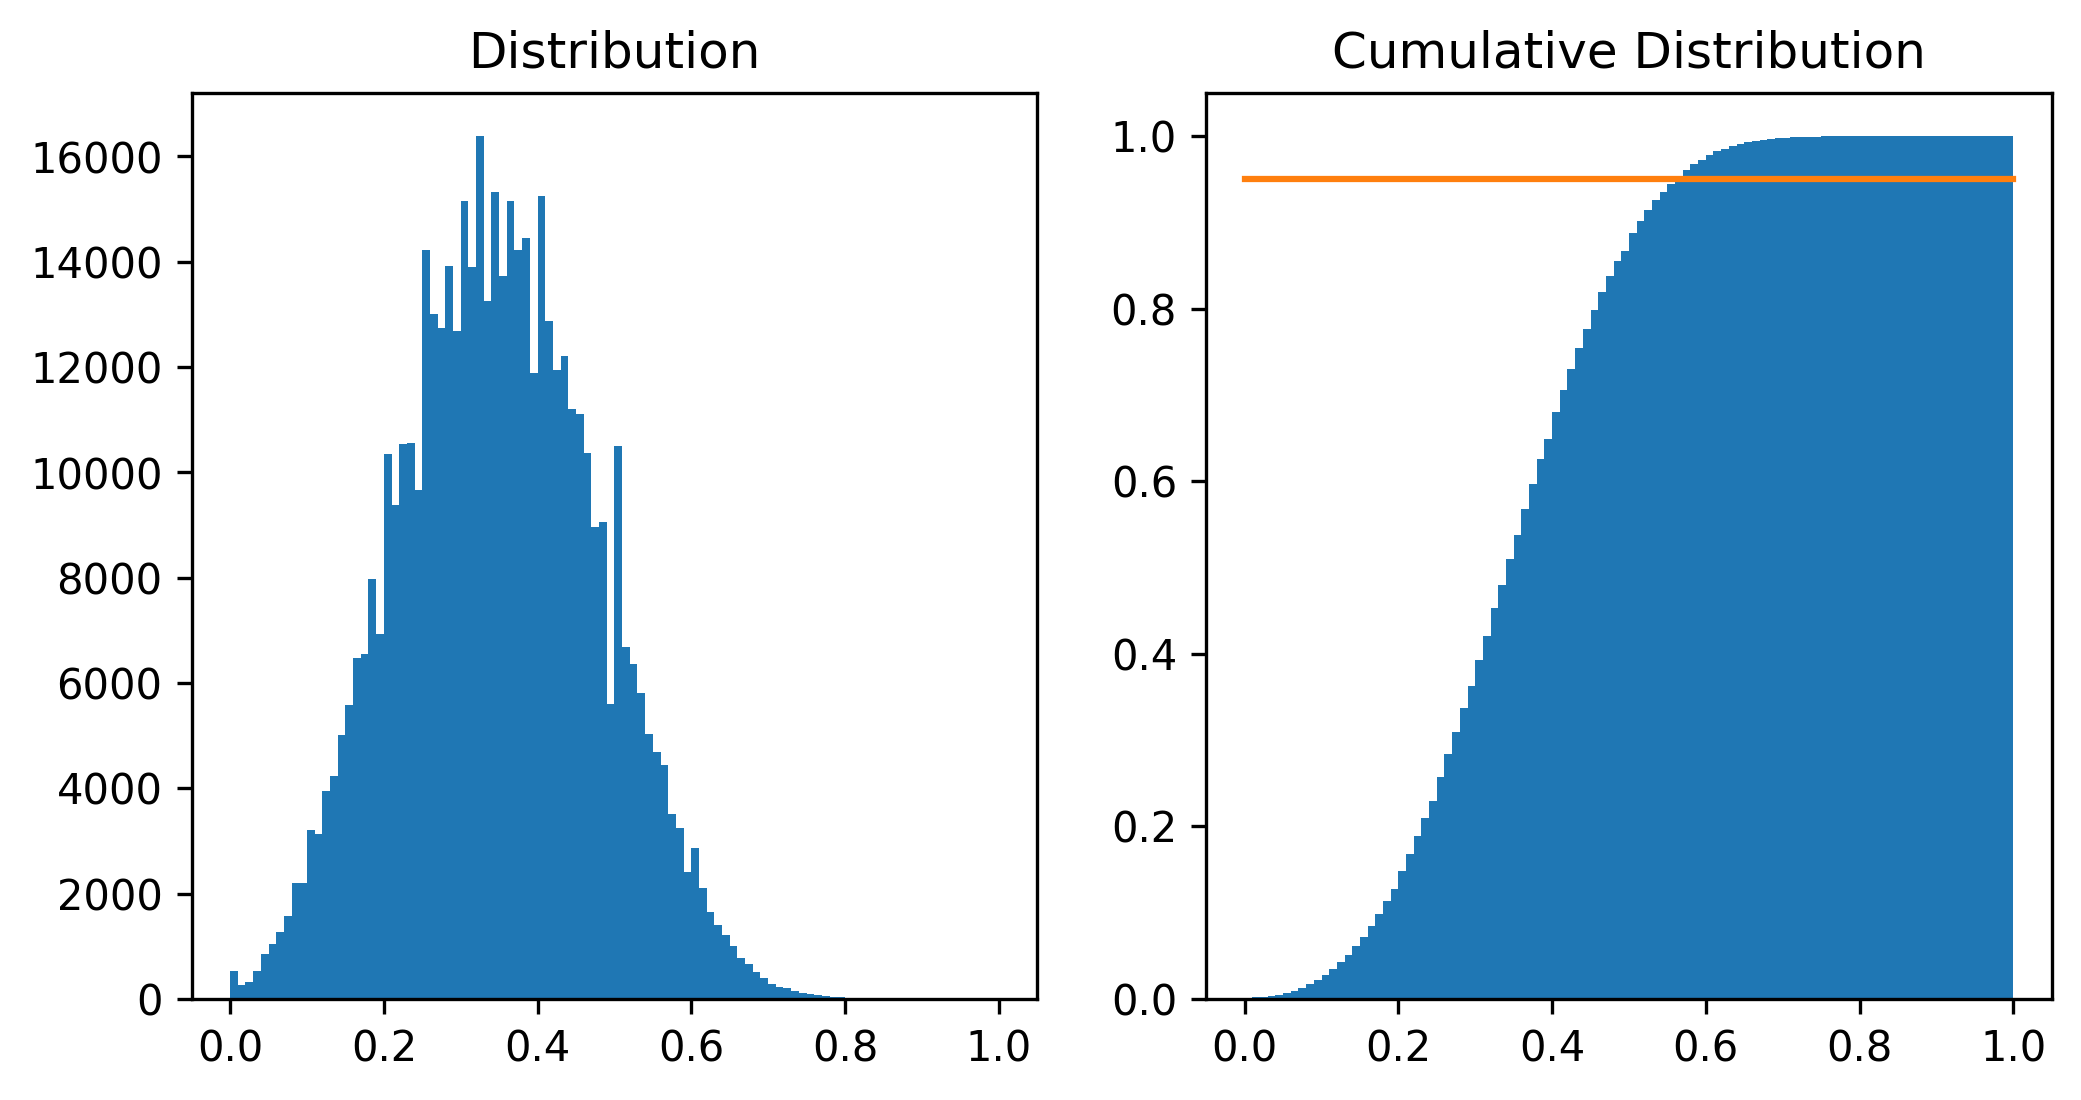

In [119]:
mybins = [ x * 0.01 for x in range(101)]

fig = plt.figure(figsize=(8,4), dpi=300)

plt.subplot(1, 2, 1)
plt.title("Distribution")
plt.hist(scores, bins=mybins)

plt.subplot(1, 2, 2)
plt.title("Cumulative Distribution")
plt.hist(scores, bins=mybins, density=True, cumulative=1)
plt.plot([0,1],[0.95,0.95]);

In [121]:
for i in range(21) :

    thresh = i / 20
    num_similar_pairs = len([x for x in scores if x >= thresh]) 
    prob = num_similar_pairs / len(scores) * 100
    print("%.3f %8d (%8.4f %%)" % (thresh, num_similar_pairs, round(prob,4)))

0.000   499500 (100.0000 %)
0.050   497010 ( 99.5015 %)
0.100   488714 ( 97.8406 %)
0.150   469193 ( 93.9325 %)
0.200   435672 ( 87.2216 %)
0.250   385198 ( 77.1167 %)
0.300   318637 ( 63.7912 %)
0.350   245621 ( 49.1734 %)
0.400   175158 ( 35.0667 %)
0.450   111668 ( 22.3560 %)
0.500    66599 ( 13.3331 %)
0.550    32209 (  6.4482 %)
0.600    13897 (  2.7822 %)
0.650     4668 (  0.9345 %)
0.700     1351 (  0.2705 %)
0.750      355 (  0.0711 %)
0.800       76 (  0.0152 %)
0.850       24 (  0.0048 %)
0.900        6 (  0.0012 %)
0.950        1 (  0.0002 %)
1.000        0 (  0.0000 %)


In [122]:
print("Average:", sum(scores)/len(scores))

Average: 0.3488195436976387


In [123]:
scores.sort()    # Sort the scores in an increasing order.

In [124]:
# to find a threshold for top 3% compound pairs (i.e., 97% percentile)
print("# total compound pairs:   ", len(scores))
print("# 95% of compound pairs:  ", len(scores) * 0.97)
print("# score at 95% percentile:", scores[ round(len(scores) * 0.97) ] )

# total compound pairs:    499500
# 95% of compound pairs:   484515.0
# score at 95% percentile: 0.5945945945945946


##Virtual screening

In [125]:
colnames = ['smiles','dat', 'id']
df_act = pd.read_csv("pygm_1c8k_actives.ism", sep=" ", names=colnames)
df_act.head(5)

,smiles,dat,id
0,c1ccc2cc(c(cc2c1)NC(=O)c3cc(ccn3)N(=O)=O)Oc4cc...,220668,CHEMBL134802
1,CC1=C(C(C(=C(N1Cc2ccc(cc2)Cl)C(=O)O)C(=O)O)c3c...,189331,CHEMBL115651
2,CCN1C(=C(C(C(=C1C(=O)O)C(=O)O)c2ccccc2Cl)C(=O)...,188996,CHEMBL113736
3,c1cc(c(c(c1)F)NC(=O)c2cc(ccn2)N(=O)=O)Oc3ccc(c...,219845,CHEMBL133911
4,CC1=C(C(C(=C(N1Cc2cccc(c2)N(=O)=O)C(=O)O)C(=O)...,189034,CHEMBL423509


In [126]:
print(len(df_act))    # Show how many structures are in the "data frame"

77


In [127]:
smiles_act = df_act.smiles.to_list()

In [128]:
import time
import requests

prolog = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"

cids_hit = dict()

for idx, mysmiles in enumerate(smiles_act) :
    
    mydata = { 'smiles' : mysmiles }
    
    url = prolog + "/compound/fastsimilarity_2d/smiles/cids/txt"
    res = requests.post(url, data=mydata)

    if ( res.status_code == 200 ) :
        cids = res.text.split()
        cids = [ int(x) for x in cids ]    # Convert CIDs from string to integer.
    else :
        print("Error at", idx, ":", df_act.loc[idx,'id'], mysmiles )
        print(res.status_code)
        print(res.content)
    
    for mycid in cids:
        cids_hit[mycid] = cids_hit.get(mycid, 0) + 1
    
    time.sleep(0.2)

In [129]:
len(cids_hit)    # Show the number of compounds returned from any query.

25917

In [130]:
sorted_by_freq = [ (v, k) for k, v in cids_hit.items() ]
sorted_by_freq.sort(reverse=True)

for v, k in enumerate(sorted_by_freq) :

    if v == 10 : 
        break
    
    print(v, k) # Print (frequency, CID)
    

0 (16, 44354348)
1 (15, 44354370)
2 (15, 44354349)
3 (15, 44354322)
4 (13, 44357907)
5 (12, 44357938)
6 (12, 44357937)
7 (12, 44354455)
8 (12, 44354454)
9 (12, 44354362)


In [132]:
cids_query = dict()

for idx, mysmiles in enumerate(smiles_act) :
    
    mydata = { 'smiles' : mysmiles }
    url = prolog + "/compound/fastidentity/smiles/cids/txt?identity_type=same_connectivity"
    res = requests.post(url, data=mydata)

    if ( res.status_code == 200 ) :
        cids = res.text.split()
        cids = [ int(x) for x in cids]
    else :
        print("Error at", idx, ":", df_act.loc[idx,'id'], mysmiles )
        print(res.status_code)
        print(res.content)
       
    for mycid in cids:
        cids_query[mycid] = cids_query.get(mycid, 0) + 1
    
    time.sleep(0.2)

    

In [133]:
len(cids_query.keys())    # Show the number of CIDs that represent the query compounds.

135

In [134]:
for mycid in cids_query.keys() :
    
    cids_hit.pop(mycid, None)

In [135]:
len(cids_hit)

25782

In [136]:
sorted_by_freq = [ (v, k) for k, v in cids_hit.items() ]
sorted_by_freq.sort(reverse=True)

for v, k in enumerate(sorted_by_freq) :
    
    if v == 10 : 
        break
    
    print(v, k)    # Print (frequency, CID)


0 (12, 11779854)
1 (11, 141135915)
2 (11, 118078858)
3 (11, 93077065)
4 (11, 93077064)
5 (11, 53013349)
6 (11, 51808718)
7 (11, 45369696)
8 (11, 17600716)
9 (10, 145780788)


In [137]:
chunk_size = 100

if ( len(cids_hit) % chunk_size == 0 ) :
    num_chunks = len(cids_hit) // chunk_size 
else :
    num_chunks = len(cids_hit) // chunk_size + 1

cids_list = list(cids_hit.keys())
    
print("# Number of chunks:", num_chunks )

csv = ""   #sets a variable called csv to save the comma separated output

for i in range(num_chunks) :
    
    print(i, end=" ")
    
    idx1 = chunk_size * i
    idx2 = chunk_size * (i + 1)

    cids_str = ",".join([ str(x) for x in cids_list[idx1:idx2] ]) # build pug input for chunks of data
    url = prolog + "/compound/cid/" + cids_str + "/property/HBondDonorCount,HBondAcceptorCount,MolecularWeight,XLogP,CanonicalSMILES,IsomericSMILES/csv"
    
    res = requests.get(url)
    
    if ( i == 0 ) : # if this is the first request, store result in empty csv variable
        csv = res.text 
    else :          # if this is a subsequent request, add the request to the csv variable adding a new line between chunks
        csv = csv + "\n".join(res.text.split()[1:]) + "\n" 
      
    time.sleep(0.2)

#print(csv)

# Number of chunks: 258
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 

In [138]:
from io import StringIO

csv_file = StringIO(csv)

df_raw = pd.read_csv(csv_file, sep=",")

df_raw.shape  

(25782, 7)

In [139]:
df_raw.head(5)    # Show the first 5 rows of the data frame

,CID,HBondDonorCount,HBondAcceptorCount,MolecularWeight,XLogP,CanonicalSMILES,IsomericSMILES
0,1731763,0,5,454.0,5.5,CCOC(=O)C1=C(N(C(=C(C1C2=CC=C(C=C2)Cl)C(=O)OCC...,CCOC(=O)C1=C(N(C(=C(C1C2=CC=C(C=C2)Cl)C(=O)OCC...
1,21795259,0,5,454.0,5.5,CCOC(=O)C1=C(N(C(=C(C1C2=CC=CC=C2Cl)C(=O)OCC)C...,CCOC(=O)C1=C(N(C(=C(C1C2=CC=CC=C2Cl)C(=O)OCC)C...
2,155906259,0,5,439.9,6.3,CCOC(=O)C1=C(N(C(=C(C1C2=CC=CC=C2Cl)C(=O)OC)C)...,CCOC(=O)C1=C(N(C(=C(C1C2=CC=CC=C2Cl)C(=O)OC)C)...
3,9910160,3,4,422.9,4.4,CC1=C(C(C(=C(N1)C)C(=O)O)C2=CC(=CC=C2)Cl)C(=O)...,CC1=C(C(C(=C(N1)C)C(=O)O)C2=CC(=CC=C2)Cl)C(=O)...
4,141955522,3,4,428.9,5.3,CCC=CC(=CC)CCNC(=O)C1=C(NC(=C(C1C2=CC(=CC=C2)C...,CC/C=C\C(=C/C)\CCNC(=O)C1=C(NC(=C(C1C2=CC(=CC=...


In [140]:
df_raw.isna().sum()    # Check if there are any NULL values.

CID                     0
HBondDonorCount         0
HBondAcceptorCount      0
MolecularWeight         0
XLogP                 836
CanonicalSMILES         0
IsomericSMILES          0
dtype: int64

In [ ]:
len(df_raw)    # Check the number of rows (which is equals to the number of CIDs)

In [141]:
# First load the cids_hit dictionary into a data frame.
df_freq = pd.DataFrame( cids_hit.items(), columns=['CID','HitFreq'])
df_freq.head(5)

,CID,HitFreq
0,1731763,2
1,21795259,4
2,155906259,4
3,9910160,3
4,141955522,3


In [142]:
# Double-check if the data are loaded correctly
# Compare the data with those from Cell [12]
df_freq.sort_values(by=['HitFreq', 'CID'], ascending=False).head(10)

,CID,HitFreq
1749,11779854,12
729,141135915,11
913,118078858,11
3046,93077065,11
3045,93077064,11
1483,53013349,11
2428,51808718,11
2230,45369696,11
2019,17600716,11
624,145780788,10


In [143]:
# Create a new data frame called "df" by joining the df and df_freq data frames
df = df_raw.join(df_freq.set_index('CID'), on='CID')
df.shape

(25782, 8)

In [144]:
df.sort_values(by=['HitFreq', 'CID'], ascending=False).head(10)

,CID,HBondDonorCount,HBondAcceptorCount,MolecularWeight,XLogP,CanonicalSMILES,IsomericSMILES,HitFreq
1749,11779854,3,2,305.3,2.6,C1C(C(=O)NC2=CC=CC=C21)NC(=O)C3=CC4=CC=CC=C4N3,C1C(C(=O)NC2=CC=CC=C21)NC(=O)C3=CC4=CC=CC=C4N3,12
729,141135915,1,1,290.4,4.2,CC1CCC2=CC=CC=C2N1C(=O)C3=CC4=CC=CC=C4N3,CC1CCC2=CC=CC=C2N1C(=O)C3=CC4=CC=CC=C4N3,11
913,118078858,1,2,333.4,3.0,CC1CN(C2=CC=CC=C2N1C(=O)C)C(=O)C3=CC4=CC=CC=C4N3,C[C@H]1CN(C2=CC=CC=C2N1C(=O)C)C(=O)C3=CC4=CC=C...,11
3046,93077065,2,2,409.5,4.8,C1CC2=CC=CC=C2N(C1)C(=O)C(C3=CC=CC=C3)NC(=O)C4...,C1CC2=CC=CC=C2N(C1)C(=O)[C@@H](C3=CC=CC=C3)NC(...,11
3045,93077064,2,2,409.5,4.8,C1CC2=CC=CC=C2N(C1)C(=O)C(C3=CC=CC=C3)NC(=O)C4...,C1CC2=CC=CC=C2N(C1)C(=O)[C@H](C3=CC=CC=C3)NC(=...,11
1483,53013349,2,2,409.5,4.8,C1CC2=CC=CC=C2N(C1)C(=O)C(C3=CC=CC=C3)NC(=O)C4...,C1CC2=CC=CC=C2N(C1)C(=O)C(C3=CC=CC=C3)NC(=O)C4...,11
2428,51808718,2,3,390.5,2.9,CC(C(=O)N1CCN(CC1)CC2=CC=CC=C2)NC(=O)C3=CC4=CC...,C[C@H](C(=O)N1CCN(CC1)CC2=CC=CC=C2)NC(=O)C3=CC...,11
2230,45369696,2,3,390.5,2.9,CC(C(=O)N1CCN(CC1)CC2=CC=CC=C2)NC(=O)C3=CC4=CC...,CC(C(=O)N1CCN(CC1)CC2=CC=CC=C2)NC(=O)C3=CC4=CC...,11
2019,17600716,2,3,390.5,2.9,CC(C(=O)N1CCN(CC1)CC2=CC=CC=C2)NC(=O)C3=CC4=CC...,C[C@@H](C(=O)N1CCN(CC1)CC2=CC=CC=C2)NC(=O)C3=C...,11
624,145780788,1,2,437.5,5.3,CCC(=O)N(C1CC(N(C2=CC=CC=C12)C(=O)C3=CC4=CC=CC...,CCC(=O)N([C@@H]1C[C@@H](N(C2=CC=CC=C12)C(=O)C3...,10


In [ ]:
len(df[ df['HBondDonorCount'] <= 5 ])

In [ ]:
len(df[ df['HBondAcceptorCount'] <= 10 ])

In [ ]:
len(df[ df['MolecularWeight'] <= 500 ])

In [ ]:
len(df[ df['XLogP'] < 5 ])

In [145]:
df = df[ ( df['HBondDonorCount'] <= 5) &
         ( df['HBondAcceptorCount'] <= 10 ) &
         ( df['MolecularWeight'] <= 500 ) &
         ( df['XLogP'] < 5 ) ]

In [ ]:
len(df)

In [147]:
cids_top = df.sort_values(by=['HitFreq', 'CID'], ascending=False).head(10).CID.to_list()

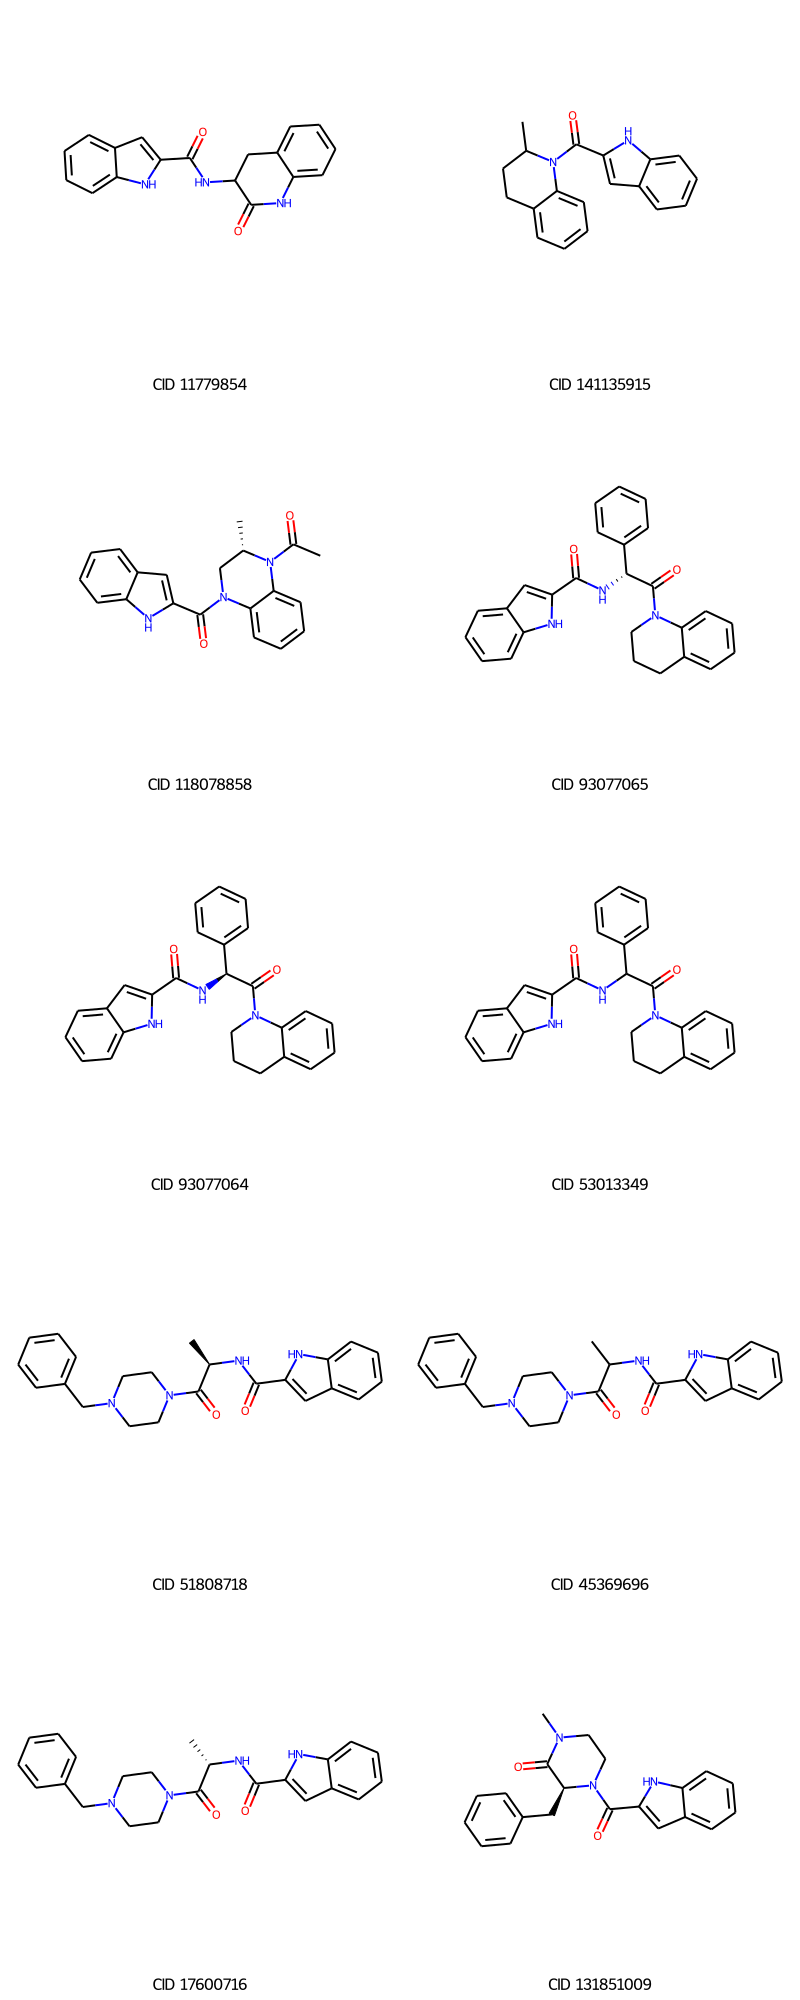

In [148]:
from rdkit import Chem
from rdkit.Chem import Draw

mols = []

for mycid in cids_top :
    
    mysmiles = df[ df.CID==mycid ].IsomericSMILES.item()
    
    mol = Chem.MolFromSmiles( mysmiles )
    Chem.FindPotentialStereoBonds(mol)    # Identify potential stereo bonds!
    mols.append(mol)

mylegends = [ "CID " + str(x) for x in cids_top ]
img = Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(400,400), legends=mylegends)
display(img)

In [149]:
len(df)

21890

In [150]:
len(df.CanonicalSMILES.unique())

17431

In [151]:
canonical_smiles = df.CanonicalSMILES.unique()

In [152]:
df[ df.CanonicalSMILES == canonical_smiles[0] ]

,CID,HBondDonorCount,HBondAcceptorCount,MolecularWeight,XLogP,CanonicalSMILES,IsomericSMILES,HitFreq
3,9910160,3,4,422.9,4.4,CC1=C(C(C(=C(N1)C)C(=O)O)C2=CC(=CC=C2)Cl)C(=O)...,CC1=C(C(C(=C(N1)C)C(=O)O)C2=CC(=CC=C2)Cl)C(=O)...,3
13,70155849,3,4,422.9,4.4,CC1=C(C(C(=C(N1)C)C(=O)O)C2=CC(=CC=C2)Cl)C(=O)...,CC1=C(C(C(=C(N1)C)C(=O)O)C2=CC(=CC=C2)Cl)C(=O)...,3


In [ ]:
df[ df.CanonicalSMILES == canonical_smiles[1] ]

In [154]:
df[ df.CanonicalSMILES == canonical_smiles[1] ].IsomericSMILES.to_list()

['C/C=C(\\C)/NC(=O)CNC(=O)C(=C(C)C)C(C1=CC(=CC=C1)Cl)C(=C(C)C)C(=O)O']

In [155]:
idx_to_include = []

for mysmiles in canonical_smiles :

    myidx = df[ df.CanonicalSMILES == mysmiles ].index.to_list()[0]
    
    idx_to_include.append( myidx )

In [156]:
len(idx_to_include)

17431

In [157]:
# Create a new column 'Include' 
# All values initialized to 0 (not include)
df['Include'] = 0
df['Include'].sum()

0

In [158]:
# Now the "Include" column's value is modified if the record is in the idx_to_include list.
df.loc[idx_to_include,'Include'] = 1
df['Include'].sum()

17431

In [159]:
df[['CID','Include']].head(10)

,CID,Include
3,9910160,1
5,141955514,1
6,141547267,1
7,139926179,1
8,139926177,1
9,118694545,1
10,118694396,1
11,70157737,1
12,70157306,1
13,70155849,0


In [159]:
cids_top = df[ df['Include'] == 1].sort_values(by=['HitFreq', 'CID'], ascending=False).head(10).CID.to_list()

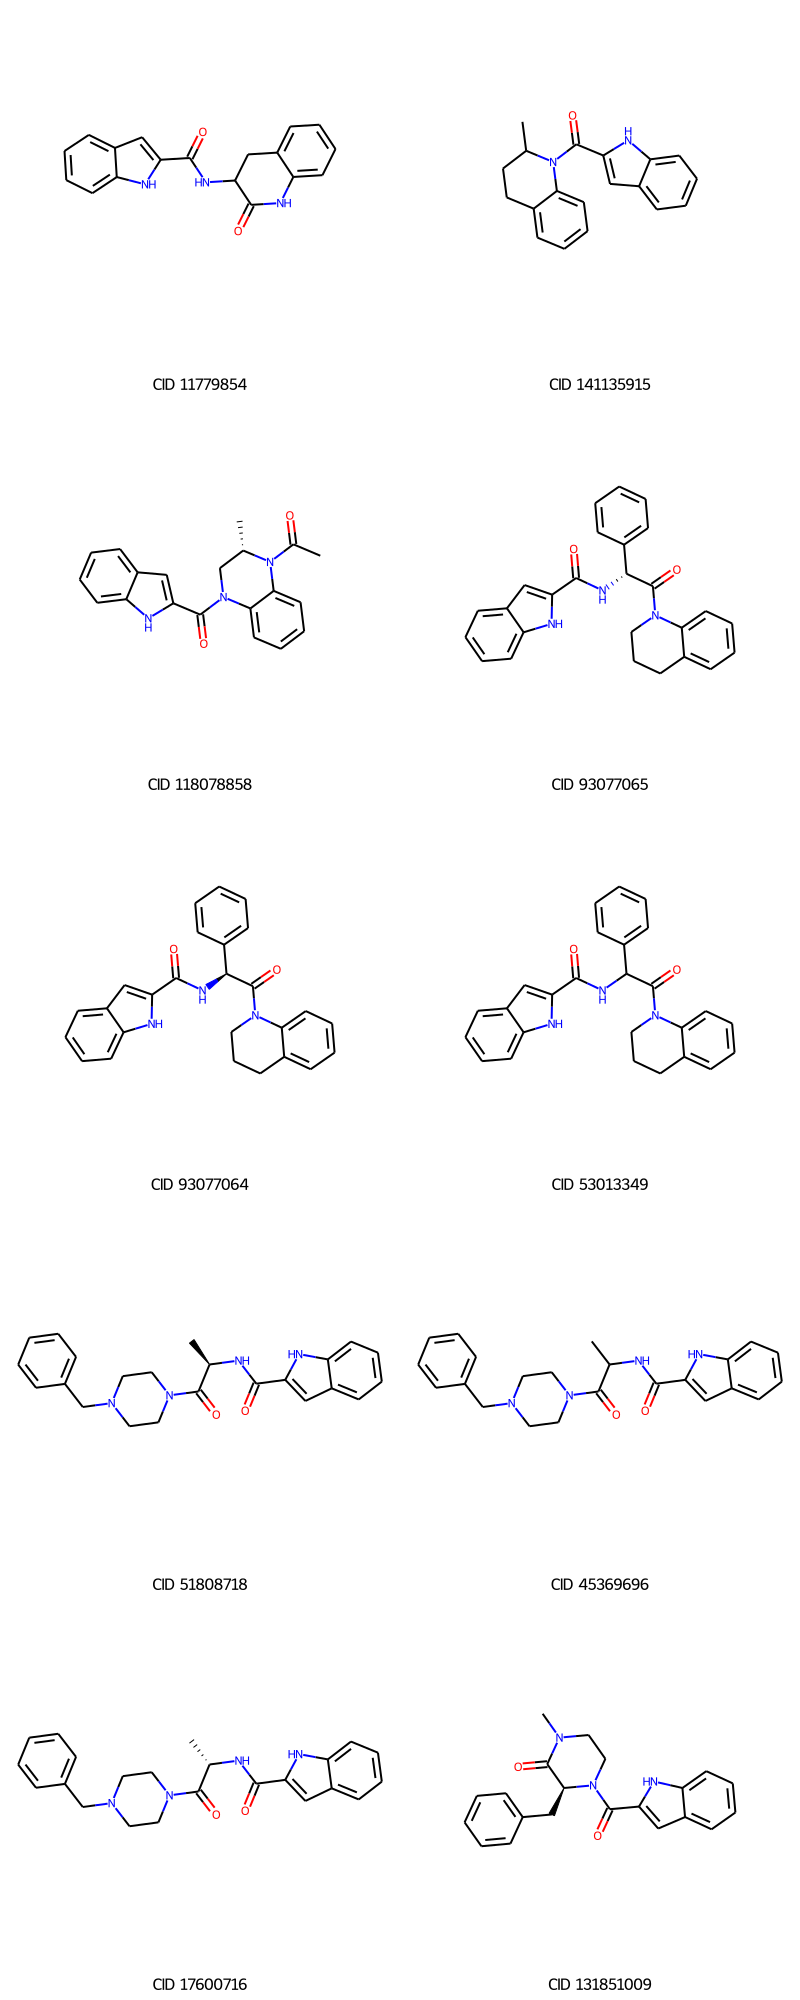

In [160]:
mols = []

for mycid in cids_top :
    
    mysmiles = df[ df.CID==mycid ].IsomericSMILES.item()
    
    mol = Chem.MolFromSmiles( mysmiles )
    Chem.FindPotentialStereoBonds(mol)    # Identify potential stereo bonds!
    mols.append(mol)

mylegends = [ "CID " + str(x) for x in cids_top ]
img = Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(400,400), legends=mylegends)
display(img)

In [161]:
from rdkit.Chem import AllChem

for idx, mycid in enumerate( cids_top ) :

    if idx == 3 :
        break
        
    mysmiles = df[ df['CID'] == mycid ].IsomericSMILES.item()

    mymol = Chem.MolFromSmiles(mysmiles)
    mymol = Chem.AddHs(mymol)
    AllChem.EmbedMolecule(mymol)
    AllChem.MMFFOptimizeMolecule(mymol)

    filename = "pygm_lig" + str(idx) + "_" + str(mycid) + ".mol"
    Chem.MolToMolFile(mymol, filename)

In [162]:
df.to_csv('pygm_df.csv')

KeyboardInterrupt: ignored

##Machine Learning for PubChem Molecules

In [164]:
import pandas as pd
import numpy as np

url = 'https://pubchem.ncbi.nlm.nih.gov/assay/pcget.cgi?query=download&record_type=datatable&actvty=all&response_type=save&aid=743139'
df_raw = pd.read_csv(url)

In [165]:
df_raw.head(7)


,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Activity Summary,Antagonist Activity,Antagonist Potency (uM),Antagonist Efficacy (%),Viability Activity,Viability Potency (uM),Viability Efficacy (%),Sample Source
0,RESULT_TYPE,NaN,NaN,NaN,NaN,NaN,NaN,STRING,STRING,FLOAT,FLOAT,STRING,FLOAT,FLOAT,STRING
1,RESULT_DESCR,NaN,NaN,NaN,NaN,NaN,NaN,Type of compound activity based on both the ar...,Type of compound activity in the aromatase ant...,The concentration of sample yielding half-maxi...,Percent inhibition of aromatase.,Type of compound activity in the cell viabilit...,The concentration of sample yielding half-maxi...,Percent inhibition of cell viability.,Where sample was obtained.
2,RESULT_UNIT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MICROMOLAR,PERCENT,NaN,MICROMOLAR,PERCENT,NaN
3,1,144203552.0,12850184.0,Inactive,0.0,NaN,NaN,inactive,inactive,NaN,0,inactive,NaN,0,NCI
4,2,144203553.0,89753.0,Inactive,0.0,NaN,NaN,inactive,inactive,NaN,0,inactive,NaN,0,NCI
5,3,144203554.0,9403.0,Inactive,0.0,NaN,NaN,inactive,inactive,NaN,0,inactive,NaN,0,NCI
6,4,144203555.0,13218779.0,Inactive,0.0,NaN,NaN,inactive,inactive,NaN,0,inactive,NaN,0,NCI


In [166]:
df_raw = df_raw[3:]
df_raw.head(5)

,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Activity Summary,Antagonist Activity,Antagonist Potency (uM),Antagonist Efficacy (%),Viability Activity,Viability Potency (uM),Viability Efficacy (%),Sample Source
3,1,144203552.0,12850184.0,Inactive,0.0,NaN,NaN,inactive,inactive,NaN,0,inactive,NaN,0,NCI
4,2,144203553.0,89753.0,Inactive,0.0,NaN,NaN,inactive,inactive,NaN,0,inactive,NaN,0,NCI
5,3,144203554.0,9403.0,Inactive,0.0,NaN,NaN,inactive,inactive,NaN,0,inactive,NaN,0,NCI
6,4,144203555.0,13218779.0,Inactive,0.0,NaN,NaN,inactive,inactive,NaN,0,inactive,NaN,0,NCI
7,5,144203556.0,142766.0,Inconclusive,25.0,NaN,NaN,inconclusive antagonist (cytotoxic),active antagonist,15.5454,-115.803,active antagonist,14.9601,-76.8218,NCI


In [168]:
df_raw.columns


Index(['PUBCHEM_RESULT_TAG', 'PUBCHEM_SID', 'PUBCHEM_CID',
       'PUBCHEM_ACTIVITY_OUTCOME', 'PUBCHEM_ACTIVITY_SCORE',
       'PUBCHEM_ACTIVITY_URL', 'PUBCHEM_ASSAYDATA_COMMENT', 'Activity Summary',
       'Antagonist Activity', 'Antagonist Potency (uM)',
       'Antagonist Efficacy (%)', 'Viability Activity',
       'Viability Potency (uM)', 'Viability Efficacy (%)', 'Sample Source'],
      dtype='object')

In [171]:
col_names_map = {'PUBCHEM_RESULT_TAG' : 'pc_result_tag', 
                 'PUBCHEM_SID' : 'sid', 
                 'PUBCHEM_CID' : 'cid',
                 'PUBCHEM_ACTIVITY_OUTCOME' : 'activity_outcome', 
                 'PUBCHEM_ACTIVITY_SCORE' : 'activity_score',
                 'PUBCHEM_ACTIVITY_URL' : 'activity_url', 
                 'PUBCHEM_ASSAYDATA_COMMENT' : 'assay_data_comment', 
                 'Activity Summary' : 'activity_summary',
                 'Antagonist Activity' : 'antagonist_activity', 
                 'Antagonist Potency (uM)' : 'antagonist_potency', 
                 'Antagonist Efficacy (%)' : 'antagonist_efficacy',
                 'Viability Activity' : 'viability_activity', 
                 'Viability Potency (uM)' : 'viability_potency',
                 'Viability Efficacy (%)' : 'viability_efficacy', 
                 'Sample Source' : 'sample_source' }
df_raw = df_raw.rename(columns = col_names_map)
df_raw.columns

Index(['pc_result_tag', 'sid', 'cid', 'activity_outcome', 'activity_score',
       'activity_url', 'assay_data_comment', 'activity_summary',
       'antagonist_activity', 'antagonist_potency', 'antagonist_efficacy',
       'viability_activity', 'viability_potency', 'viability_efficacy',
       'sample_source'],
      dtype='object')

In [172]:
df_raw = df_raw.rename(columns = col_names_map)
df_raw.columns

Index(['pc_result_tag', 'sid', 'cid', 'activity_outcome', 'activity_score',
       'activity_url', 'assay_data_comment', 'activity_summary',
       'antagonist_activity', 'antagonist_potency', 'antagonist_efficacy',
       'viability_activity', 'viability_potency', 'viability_efficacy',
       'sample_source'],
      dtype='object')

In [173]:
df_raw.groupby(['activity_outcome']).count()


,pc_result_tag,sid,cid,activity_score,activity_url,assay_data_comment,activity_summary,antagonist_activity,antagonist_potency,antagonist_efficacy,viability_activity,viability_potency,viability_efficacy,sample_source
activity_outcome,,,,,,,,,,,,,,
Active,379,379,378,379,0,0,379,379,378,379,379,115,359,379
Inactive,7562,7562,7466,7562,0,0,7562,7562,0,7562,7562,324,7449,7562
Inconclusive,2545,2545,2493,2545,0,0,2545,2545,2111,2136,2545,1206,2450,2545


In [175]:
df_raw.groupby(['activity_outcome','activity_summary']).count()


pc_result_tag   sid  \
activity_outcome activity_summary                                           
Active           active antagonist                              379   379   
Inactive         inactive                                      7562  7562   
Inconclusive     active agonist                                 612   612   
                 inconclusive                                    44    44   
                 inconclusive agonist                           414   414   
                 inconclusive agonist (cytotoxic)                59    59   
                 inconclusive antagonist                        367   367   
                 inconclusive antagonist (cytotoxic)           1049  1049   

                                                       cid  activity_score  \
activity_outcome activity_summary                                            
Active           active antagonist                     378             379   
Inactive         inactive                             7466            7562   
Inconclusive     active agonist                        571             612   
                 inconclusive                           44              44   
                 inconclusive agonist                  409             414   
                 inconclusive agonist (cytotoxic)       59              59   
                 inconclusive antagonist               364             367   
                 inconclusive antagonist (cytotoxic)  1046            1049   

                                                      activity_url  \
activity_outcome activity_summary                                    
Active           active antagonist                               0   
Inactive         inactive                                        0   
Inconclusive     active agonist                                  0   
                 inconclusive                                    0   
                 inconclusive agonist                            0   
                 inconclusive agonist (cytotoxic)                0   
                 inconclusive antagonist                         0   
                 inconclusive antagonist (cytotoxic)             0   

                                                      assay_data_comment  \
activity_outcome activity_summary                                          
Active           active antagonist                                     0   
Inactive         inactive                                              0   
Inconclusive     active agonist                                        0   
                 inconclusive                                          0   
                 inconclusive agonist                                  0   
                 inconclusive agonist (cytotoxic)                      0   
                 inconclusive antagonist                               0   
                 inconclusive antagonist (cytotoxic)                   0   

                                                      antagonist_activity  \
activity_outcome activity_summary                                           
Active           active antagonist                                    379   
Inactive         inactive                                            7562   
Inconclusive     active agonist                                       612   
                 inconclusive                                          44   
                 inconclusive agonist                                 414   
                 inconclusive agonist (cytotoxic)                      59   
                 inconclusive antagonist                              367   
                 inconclusive antagonist (cytotoxic)                 1049   

                                                      antagonist_potency  \
activity_outcome activity_summary                                          
Active           active antagonist                                   378   
Inactive         inactive                

In [199]:
df = df_raw[ (df_raw['activity_summary'] == 'active agonist' ) | 
             (df_raw['activity_summary'] == 'active antagonist' ) |
             (df_raw['activity_summary'] == 'inactive' ) ]

In [200]:
len(df)


8553

In [201]:
df = df_raw[ (df_raw['activity_summary'] == 'active agonist' ) | 
             (df_raw['activity_summary'] == 'active antagonist' ) |
             (df_raw['activity_summary'] == 'inactive' ) ]

In [202]:
df.isna().sum()


pc_result_tag             0
sid                       0
cid                     138
activity_outcome          0
activity_score            0
activity_url           8553
assay_data_comment     8553
activity_summary          0
antagonist_activity       0
antagonist_potency     7563
antagonist_efficacy       0
viability_activity        0
viability_potency      8054
viability_efficacy      155
sample_source             0
dtype: int64

In [203]:
df = df.dropna( subset=['cid'] )
len(df)

8415

In [204]:
print(len(df['sid'].unique()))
print(len(df['cid'].unique()))

8415
6863


In [205]:
df.isna().sum() 

pc_result_tag             0
sid                       0
cid                       0
activity_outcome          0
activity_score            0
activity_url           8415
assay_data_comment     8415
activity_summary          0
antagonist_activity       0
antagonist_potency     7467
antagonist_efficacy       0
viability_activity        0
viability_potency      7919
viability_efficacy      154
sample_source             0
dtype: int64

In [207]:
cid_conflict = []
idx_conflict = []

for mycid in df['cid'].unique() :
    
    outcomes = df[ df.cid == mycid ].activity_summary.unique()
    
    if len(outcomes) > 1 :
        
        idx_tmp = df.index[ df.cid == mycid ].tolist()
        idx_conflict.extend(idx_tmp)
        cid_conflict.append(mycid)

print("#", len(cid_conflict), "CIDs with conflicting activities [associated with", len(idx_conflict), "rows (SIDs).]")

# 65 CIDs with conflicting activities [associated with 146 rows (SIDs).]


In [208]:
df.loc[idx_conflict,:].head(10)


,pc_result_tag,sid,cid,activity_outcome,activity_score,activity_url,assay_data_comment,activity_summary,antagonist_activity,antagonist_potency,antagonist_efficacy,viability_activity,viability_potency,viability_efficacy,sample_source
8,6,144203557.0,16043.0,Inactive,0.0,NaN,NaN,inactive,inactive,NaN,0,inactive,NaN,0,NCI
5956,5954,144209507.0,16043.0,Active,43.0,NaN,NaN,active antagonist,active antagonist,54.4827,-73.4024,inconclusive antagonist,NaN,NaN,SigmaAldrich
6850,6848,144210401.0,16043.0,Inactive,0.0,NaN,NaN,inactive,inactive,NaN,0,inactive,NaN,0,SIGMA
52,50,144203601.0,443939.0,Inactive,0.0,NaN,NaN,inactive,inactive,NaN,0,inactive,NaN,0,NCI
6130,6128,144209681.0,443939.0,Active,61.0,NaN,NaN,active antagonist,active antagonist,1.65519,-115.932,active antagonist,12.1763,-120.598,Toronto Research
66,64,144203615.0,2170.0,Inactive,0.0,NaN,NaN,inactive,inactive,NaN,0,inactive,NaN,0,BIOMOL
9118,9116,144212669.0,2170.0,Active,50.0,NaN,NaN,active antagonist,active antagonist,16.5803,-115.202,inconclusive antagonist,61.1306,-80.7706,SIGMA
106,104,144203655.0,2554.0,Inconclusive,20.0,NaN,NaN,active agonist,active agonist,2.87255,73.7025,inactive,NaN,0,SigmaAldrich
5920,5918,144209471.0,2554.0,Inactive,0.0,NaN,NaN,inactive,inactive,NaN,0,inactive,NaN,0,SIGMA
6964,6962,144210515.0,2554.0,Inactive,0.0,NaN,NaN,inactive,inactive,NaN,0,inactive,NaN,0,SIGMA


In [209]:
df = df.drop(idx_conflict)
df.groupby('activity_summary').count()


,pc_result_tag,sid,cid,activity_outcome,activity_score,activity_url,assay_data_comment,antagonist_activity,antagonist_potency,antagonist_efficacy,viability_activity,viability_potency,viability_efficacy,sample_source
activity_summary,,,,,,,,,,,,,,
active agonist,537,537,537,537,537,0,0,537,537,537,537,58,517,537
active antagonist,343,343,343,343,343,0,0,343,342,343,343,108,326,343
inactive,7389,7389,7389,7389,7389,0,0,7389,0,7389,7389,318,7278,7389


In [210]:
print(len(df['sid'].unique()))
print(len(df['cid'].unique()))

8269
6798


In [211]:
df = df.drop_duplicates(subset='cid')  # remove duplicate rows except for the first occurring row.
print(len(df['sid'].unique()))
print(len(df['cid'].unique()))

6798
6798


In [212]:
df['activity'] = [ 0 if x == 'inactive' else 1 for x in df['activity_summary'] ]


In [213]:
df.groupby('activity_summary').count()


,pc_result_tag,sid,cid,activity_outcome,activity_score,activity_url,assay_data_comment,antagonist_activity,antagonist_potency,antagonist_efficacy,viability_activity,viability_potency,viability_efficacy,sample_source,activity
activity_summary,,,,,,,,,,,,,,,
active agonist,451,451,451,451,451,0,0,451,451,451,451,44,432,451,451
active antagonist,291,291,291,291,291,0,0,291,290,291,291,88,275,291,291
inactive,6056,6056,6056,6056,6056,0,0,6056,0,6056,6056,269,5970,6056,6056


In [215]:
df_activity = df[['cid','activity']]


In [216]:
df_activity.head(5)


,cid,activity
3,12850184.0,0
4,89753.0,0
5,9403.0,0
6,13218779.0,0
12,637566.0,0


In [217]:
cids = df.cid.astype(int).tolist()


In [218]:
chunk_size = 200
num_cids = len(cids)

if num_cids % chunk_size == 0 :
    num_chunks = int( num_cids / chunk_size )
else :
    num_chunks = int( num_cids / chunk_size ) + 1

print("# CIDs = ", num_cids)
print("# CID Chunks = ", num_chunks, "(chunked by ", chunk_size, ")")

# CIDs =  6798
# CID Chunks =  34 (chunked by  200 )


In [219]:
import time
import requests
from io import StringIO

df_smiles = pd.DataFrame()
list_dfs = []  # temporary list of data frames

for i in range(0, num_chunks) :
    
    idx1 = chunk_size * i
    idx2 = chunk_size * (i + 1)
    cidstr = ",".join( str(x) for x in cids[idx1:idx2] )

    url = ('https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/' + cidstr + '/property/IsomericSMILES/TXT')
    res = requests.get(url)
    data = pd.read_csv( StringIO(res.text), header=None, names=['smiles'] )
    list_dfs.append(data)
    
    time.sleep(0.2)
    
    if ( i % 5 == 0 ) :
        print("Processing Chunk ", i)   

#    if ( i == 2 ) : break  #- for debugging

df_smiles = pd.concat(list_dfs,ignore_index=True)
df_smiles[ 'cid' ] = cids
df_smiles.head(5)

Processing Chunk  0
Processing Chunk  5
Processing Chunk  10
Processing Chunk  15
Processing Chunk  20
Processing Chunk  25
Processing Chunk  30


,smiles,cid
0,C(C(=O)[C@H]([C@@H]([C@H](C(=O)[O-])O)O)O)O.C(...,12850184
1,C([C@H]([C@H]([C@@H]([C@H](C(=O)[O-])O)O)O)O)O...,89753
2,C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@@H]2OC(=O)CCC...,9403
3,C[C@@]12CC[C@@H](C1(C)C)C[C@H]2OC(=O)CSC#N,13218779
4,CC(=CCC/C(=C/CO)/C)C,637566


In [220]:
df_smiles = df_smiles[['cid','smiles']]
df_smiles.head(5)

,cid,smiles
0,12850184,C(C(=O)[C@H]([C@@H]([C@H](C(=O)[O-])O)O)O)O.C(...
1,89753,C([C@H]([C@H]([C@@H]([C@H](C(=O)[O-])O)O)O)O)O...
2,9403,C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@@H]2OC(=O)CCC...
3,13218779,C[C@@]12CC[C@@H](C1(C)C)C[C@H]2OC(=O)CSC#N
4,637566,CC(=CCC/C(=C/CO)/C)C


In [221]:
from rdkit import Chem
from rdkit.Chem import MACCSkeys

In [223]:
fps=dict()

for idx, row in df_smiles.iterrows() :
    
    mol = Chem.MolFromSmiles(row.smiles)
    
    if mol == None :
        print("Can't generate MOL object:", "CID", row.cid, row.smiles)
    else:
        fps[row.cid] = [row.cid] + list(MACCSkeys.GenMACCSKeys(mol).ToBitString())

Can't generate MOL object: CID 28145 [NH4+].[NH4+].F[Si-2](F)(F)(F)(F)F
Can't generate MOL object: CID 28127 F[Si-2](F)(F)(F)(F)F.[Na+].[Na+]


In [228]:
# Generate column names
fpbitnames = []

fpbitnames.append('cid')

for i in range(0,167):   # from MACCS000 to MACCS166
    fpbitnames.append( "maccs" + str(i).zfill(3) )


In [229]:
df_fps = pd.DataFrame.from_dict(fps, orient='index', columns=fpbitnames)
df_fps.head(5)


,cid,maccs000,maccs001,maccs002,maccs003,maccs004,maccs005,maccs006,maccs007,maccs008,...,maccs157,maccs158,maccs159,maccs160,maccs161,maccs162,maccs163,maccs164,maccs165,maccs166
12850184,12850184,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,1
89753,89753,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,1
9403,9403,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,1,1,1,1,0
13218779,13218779,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,0,1,1,1,0
637566,637566,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0


In [230]:
df_activity.head(3)


,cid,activity
3,12850184.0,0
4,89753.0,0
5,9403.0,0


In [231]:
df_fps.head(3)


,cid,maccs000,maccs001,maccs002,maccs003,maccs004,maccs005,maccs006,maccs007,maccs008,...,maccs157,maccs158,maccs159,maccs160,maccs161,maccs162,maccs163,maccs164,maccs165,maccs166
12850184,12850184,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,1
89753,89753,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,1
9403,9403,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,1,1,1,1,0


In [232]:
df_data = df_activity.join(df_fps.set_index('cid'), on='cid')


In [233]:
df_data[df_data.isna().any(axis=1)]


,cid,activity,maccs000,maccs001,maccs002,maccs003,maccs004,maccs005,maccs006,maccs007,...,maccs157,maccs158,maccs159,maccs160,maccs161,maccs162,maccs163,maccs164,maccs165,maccs166
2293,28145.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9077,28127.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [234]:
df_data = df_data.dropna()
len(df_data)

6796

In [235]:
df_data.to_csv('df_data.csv')


In [236]:
X = df_data.iloc[:,2:]
y = df_data['activity'].values

In [237]:
X.head(3)


,maccs000,maccs001,maccs002,maccs003,maccs004,maccs005,maccs006,maccs007,maccs008,maccs009,...,maccs157,maccs158,maccs159,maccs160,maccs161,maccs162,maccs163,maccs164,maccs165,maccs166
3,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,1
5,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,1,1,1,1,0


In [238]:
print(len(y))    # Number of all compounds
y.sum()          # Number of actives

6796


742

In [239]:
from sklearn.feature_selection import VarianceThreshold


In [240]:
X.shape

(6796, 167)

In [241]:
sel = VarianceThreshold()
X=sel.fit_transform(X)
X.shape  #- After removal

(6796, 163)

In [242]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, shuffle=True, random_state=3100, stratify=y, test_size=0.1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(y_train.sum(), y_test.sum())

(6116, 163) (680, 163) (6116,) (680,)
668 74


In [243]:
print("# inactives : ", len(y_train) - y_train.sum())
print("# actives   : ", y_train.sum())

# inactives :  5448
# actives   :  668


In [244]:
# Indicies of each class' observations
idx_inactives = np.where( y_train == 0 )[0]
idx_actives   = np.where( y_train == 1 )[0]

# Number of observations in each class
num_inactives = len(idx_inactives)
num_actives   = len(idx_actives)

# Randomly sample from inactives without replacement
np.random.seed(0)
idx_inactives_downsampled = np.random.choice(idx_inactives, size=num_actives, replace=False)

# Join together downsampled inactives with actives
X_train = np.vstack((X_train[idx_inactives_downsampled], X_train[idx_actives]))
y_train = np.hstack((y_train[idx_inactives_downsampled], y_train[idx_actives]))

In [ ]:
print("# inactives : ", len(y_train) - y_train.sum())
print("# actives   : ", y_train.sum())

In [246]:
print(len(y_train))
print(len(X_train))
print(len(X_train[0]))

1336
1336
163


In [247]:
from sklearn.naive_bayes import BernoulliNB        #-- Naive Bayes
from sklearn.tree import DecisionTreeClassifier    #-- Decision Tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [248]:
clf = BernoulliNB()            # set up the NB classification model


In [252]:
clf.fit( X_train ,y_train )    # Train the model by fitting it to the data.


BernoulliNB()

In [253]:
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)


BernoulliNB()

In [254]:
y_true, y_pred = y_train, clf.predict( X_train )    # Apply the model to predict the training compound's activity.


In [255]:
CMat = confusion_matrix( y_true, y_pred )    #-- generate confusion matrix


In [256]:
acc  = accuracy_score( y_true, y_pred )

sens = CMat[ 1 ][ 1 ] / ( CMat[ 1 ][ 0 ] + CMat[ 1 ][ 1 ] )    # TP / (FN + TP)
spec = CMat[ 0 ][ 0 ] / ( CMat[ 0 ][ 0 ] + CMat[ 0 ][ 1 ] )    # TN / (TN + FP )
bacc = (sens + spec) / 2

y_score = clf.predict_proba( X_train )[:, 1]
auc = roc_auc_score( y_true, y_score )

In [257]:
y_true, y_pred = y_test, clf.predict(X_test)    #-- Apply the model to predict the test set compounds' activity.


In [258]:
CMat = confusion_matrix( y_true, y_pred )    #-- generate confusion matrix


In [259]:
acc  = accuracy_score( y_true, y_pred )

sens = CMat[ 1 ][ 1 ] / ( CMat[ 1 ][ 0 ] + CMat[ 1 ][ 1 ] )
spec = CMat[ 0 ][ 0 ] / ( CMat[ 0 ][ 0 ] + CMat[ 0 ][ 1 ] )
bacc = (sens + spec) / 2

y_score = clf.predict_proba( X_test )[:, 1]
auc = roc_auc_score( y_true, y_score )

print("#-- Accuracy          = ", acc)
print("#-- Balanced Accuracy = ", bacc)
print("#-- Sensitivity       = ", sens)
print("#-- Specificity       = ", spec)
print("#-- AUC-ROC           = ", auc)

#-- Accuracy          =  0.6735294117647059
#-- Balanced Accuracy =  0.6448131299616449
#-- Sensitivity       =  0.6081081081081081
#-- Specificity       =  0.6815181518151815
#-- AUC-ROC           =  0.7240099009900991


In [260]:
print( classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.68      0.79       606
           1       0.19      0.61      0.29        74

    accuracy                           0.67       680
   macro avg       0.56      0.64      0.54       680
weighted avg       0.85      0.67      0.73       680



In [261]:
clf = DecisionTreeClassifier( random_state=0 )    # set up the DT classification model


In [262]:
clf.fit( X_train ,y_train )    # Train the model by fitting it to the data (using the default values for all parameters)


DecisionTreeClassifier(random_state=0)

In [266]:
y_true, y_pred = y_train, clf.predict( X_train )    # Apply the model to predict the training compound's activity.


In [267]:
CMat = confusion_matrix( y_true, y_pred )    #-- generate confusion matrix


In [268]:
acc  = accuracy_score( y_true, y_pred )

sens = CMat[ 1 ][ 1 ] / ( CMat[ 1 ][ 0 ] + CMat[ 1 ][ 1 ] )    # TP / (FN + TP)
spec = CMat[ 0 ][ 0 ] / ( CMat[ 0 ][ 0 ] + CMat[ 0 ][ 1 ] )    # TN / (TN + FP )
bacc = (sens + spec) / 2

y_score = clf.predict_proba( X_train )[:, 1]
auc = roc_auc_score( y_true, y_score )

In [269]:
print("#-- Accuracy          = ", acc)
print("#-- Balanced Accuracy = ", bacc)
print("#-- Sensitivity       = ", sens)
print("#-- Specificity       = ", spec)
print("#-- AUC-ROC           = ", auc)

#-- Accuracy          =  0.9940119760479041
#-- Balanced Accuracy =  0.9940119760479043
#-- Sensitivity       =  0.9955089820359282
#-- Specificity       =  0.9925149700598802
#-- AUC-ROC           =  0.9998890691670551
